# 1단계. 데이터 전처리

### 데이터 불러오기

In [2]:
import pandas as pd
from pytimekr import pytimekr
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce

In [3]:
data_set=pd.read_excel('preprocessed_두리발_2020년1월_2022년7월_콜상세내역.xlsx')

In [4]:
data=data_set.copy()

In [5]:
data

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,하차일시,요금,배차대기시간(분),승차대기시간(분),총대기시간(분),승차시간(분),직선거리(km),주말,공휴일
0,2020-01-01 00:00:37.293,1,부산광역시 북구,부산 사하구,492973,290634,488050,273006,2020-01-01 01:20:24.160,2020-01-01 01:39:39,2020-01-01 02:15:23,8040,79.781117,19.247333,99.028450,35.733333,5660.964792,False,True
1,2020-01-01 00:07:01.397,1,부산광역시 연제구,부산광역시 북구,496437,287956,492997,296920,2020-01-01 02:37:23.367,2020-01-01 02:56:43,2020-01-01 03:20:17,5640,150.366167,19.327217,169.693383,23.566667,6168.845968,False,True
2,2020-01-01 00:21:50.623,1,부산광역시 중구,부산광역시 동래구,494364,278475,499494,289547,2020-01-01 01:27:57.327,2020-01-01 02:02:10,2020-01-01 02:37:22,5400,66.111733,34.211217,100.322950,35.200000,11600.989905,False,True
3,2020-01-01 00:23:23.330,1,부산광역시 북구,부산광역시 북구,491389,290013,492599,295250,2020-01-01 02:26:33.040,2020-01-01 02:44:25,2020-01-01 03:00:47,3000,123.161833,17.866000,141.027833,16.366667,10458.344273,False,True
4,2020-01-01 00:34:42.987,1,부산광역시 해운대구,부산광역시 수영구,503998,285650,502492,286027,2020-01-01 03:04:10.433,2020-01-01 03:35:39,2020-01-01 03:45:13,2160,149.457433,31.476117,180.933550,9.566667,7548.863006,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,2022-07-31 21:13:08.880,7,부산광역시 동래구,부산광역시 해운대구,501300,288679,507568,286400,2022-07-31 21:34:29.647,2022-07-31 21:54:23,2022-07-31 22:20:35,3700,21.346117,19.889217,41.235333,26.200000,3817.166239,True,False
654870,2022-07-31 21:35:45.633,7,부산광역시 해운대구,부산광역시 해운대구,506206,292715,509093,287693,2022-07-31 21:56:30.807,2022-07-31 22:25:08,2022-07-31 22:53:26,4600,20.752900,28.619883,49.372783,28.300000,2075.931412,True,False
654871,2022-07-31 21:46:47.023,7,부산광역시 해운대구,부산광역시 기장군,506180,285160,506010,304852,2022-07-31 22:20:20.247,2022-07-31 22:35:44,2022-07-31 23:25:51,7800,33.553733,15.395883,48.949617,50.116667,16842.972906,True,False
654872,2022-07-31 21:53:21.040,7,부산광역시 해운대구,부산광역시 수영구,502745,286538,501997,285978,2022-07-31 22:53:10.877,2022-07-31 23:17:52,2022-07-31 23:28:10,1800,59.830617,24.685383,84.516000,10.300000,16591.277118,True,False


### 잘못 표기된 데이터 확인 및 삭제

- 접수일시, 승차일시, 배차일시, 하차일시 년도 값 잘못 표기된 것 확인하기

In [6]:
import pandas as pd

# 날짜 컬럼을 datetime 타입으로 변환 (필요한 경우)
data['접수일시'] = pd.to_datetime(data['접수일시'])
data['배차일시'] = pd.to_datetime(data['배차일시'])
data['승차일시'] = pd.to_datetime(data['승차일시'])
data['하차일시'] = pd.to_datetime(data['하차일시'])

# 2020년부터 2022년 사이가 아닌 데이터 필터링
filtered_df = data[
    (data['접수일시'] < '2020-01-01') | (data['접수일시'] > '2022-12-31') |
    (data['배차일시'] < '2020-01-01') | (data['배차일시'] > '2022-12-31') |
    (data['승차일시'] < '2020-01-01') | (data['승차일시'] > '2022-12-31') |
    (data['하차일시'] < '2020-01-01') | (data['하차일시'] > '2022-12-31')
]

# 결과 출력
print(filtered_df)

Empty DataFrame
Columns: [접수일시, 월, 출발지역, 목적지역, 호출지경도, 호출지위도, 목적지경도, 목적지위도, 배차일시, 승차일시, 하차일시, 요금, 배차대기시간(분), 승차대기시간(분), 총대기시간(분), 승차시간(분), 직선거리(km), 주말, 공휴일]
Index: []


- 배차일시 날짜보다 승차일시가 더 빠른 데이터 알아보기

In [7]:
# 날짜 컬럼을 datetime 타입으로 변환 (필요한 경우)
data['배차일시'] = pd.to_datetime(data['배차일시'])
data['승차일시'] = pd.to_datetime(data['승차일시'])

# 배차일시가 승차일시보다 후인 데이터 필터링
invalid_dates_df = data[data['승차일시'] < data['배차일시']]

# 결과 출력
print(invalid_dates_df)

Empty DataFrame
Columns: [접수일시, 월, 출발지역, 목적지역, 호출지경도, 호출지위도, 목적지경도, 목적지위도, 배차일시, 승차일시, 하차일시, 요금, 배차대기시간(분), 승차대기시간(분), 총대기시간(분), 승차시간(분), 직선거리(km), 주말, 공휴일]
Index: []


- 승차대기시간 이상값 확인

In [8]:
# 승차대기시간(분)에서 1보다 작은 값을 제외하고 필터링
filtered_df = data[data['승차대기시간(분)'] < 1]

# 결과 출력
filtered_df

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,하차일시,요금,배차대기시간(분),승차대기시간(분),총대기시간(분),승차시간(분),직선거리(km),주말,공휴일
237,2020-01-01 15:48:48.033,1,부산광역시 동구,부산광역시 동래구,496933,282839,498875,289257,2020-01-01 15:49:59.160,2020-01-01 15:50:38,2020-01-01 16:17:49,3200,1.185450,0.647333,1.832783,27.183333,12982.446896,False,True
322,2020-01-01 19:28:19.207,1,부산광역시 해운대구,부산광역시 동구,502028,288303,496944,282392,2020-01-01 19:31:16.880,2020-01-01 19:31:58,2020-01-01 19:52:52,3700,2.961217,0.685333,3.646550,20.900000,15311.755033,False,True
524,2020-01-02 09:05:15.733,1,부산광역시 영도구,부산광역시 중구,497354,275587,494559,278144,2020-01-02 09:05:26.843,2020-01-02 09:05:30,2020-01-02 09:05:31,0,0.185167,0.052617,0.237783,0.016667,9068.341981,False,False
678,2020-01-02 11:08:16.337,1,부산광역시 사상구,부산광역시 사하구,489716,282830,488745,273069,2020-01-02 11:08:16.630,2020-01-02 11:08:29,2020-01-02 11:28:57,3700,0.004883,0.206167,0.211050,20.466667,10561.619952,False,False
775,2020-01-02 12:00:22.160,1,부산광역시 서구,경상남도 김해시,492822,280552,481169,292511,2020-01-02 12:00:22.470,2020-01-02 12:00:31,2020-01-02 12:34:49,5600,0.005167,0.142167,0.147333,34.300000,12823.201740,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654388,2022-07-30 15:55:25.923,7,부산광역시 해운대구,부산광역시 영도구,501859,288721,498389,276871,2022-07-30 15:57:09.923,2022-07-30 15:57:48,2022-07-30 16:33:05,5200,1.733333,0.634617,2.367950,35.283333,13656.220696,True,False
654493,2022-07-30 21:32:19.470,7,부산광역시 동래구,부산광역시 동래구,498703,290283,500243,290125,2022-07-30 21:35:04.047,2022-07-30 21:35:27,2022-07-30 21:47:01,1800,2.742950,0.382550,3.125500,11.566667,12654.153967,True,False
654635,2022-07-31 10:53:58.983,7,부산광역시 해운대구,부산광역시 기장군,502411,291191,513006,301986,2022-07-31 10:53:59.373,2022-07-31 10:54:42,2022-07-31 11:31:34,5500,0.006500,0.710450,0.716950,36.866667,8324.696737,True,False
654752,2022-07-31 13:52:23.087,7,부산광역시 북구,부산광역시 북구,491849,290579,492610,290392,2022-07-31 13:59:03.850,2022-07-31 13:59:24,2022-07-31 14:07:20,1800,6.679383,0.335833,7.015217,7.933333,17365.611103,True,False


In [9]:
# 승차대기시간(분)에서 1보다 작은 값을 제외하고 필터링
data = data[data['승차대기시간(분)'] >= 1]

# 결과 출력
data

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,하차일시,요금,배차대기시간(분),승차대기시간(분),총대기시간(분),승차시간(분),직선거리(km),주말,공휴일
0,2020-01-01 00:00:37.293,1,부산광역시 북구,부산 사하구,492973,290634,488050,273006,2020-01-01 01:20:24.160,2020-01-01 01:39:39,2020-01-01 02:15:23,8040,79.781117,19.247333,99.028450,35.733333,5660.964792,False,True
1,2020-01-01 00:07:01.397,1,부산광역시 연제구,부산광역시 북구,496437,287956,492997,296920,2020-01-01 02:37:23.367,2020-01-01 02:56:43,2020-01-01 03:20:17,5640,150.366167,19.327217,169.693383,23.566667,6168.845968,False,True
2,2020-01-01 00:21:50.623,1,부산광역시 중구,부산광역시 동래구,494364,278475,499494,289547,2020-01-01 01:27:57.327,2020-01-01 02:02:10,2020-01-01 02:37:22,5400,66.111733,34.211217,100.322950,35.200000,11600.989905,False,True
3,2020-01-01 00:23:23.330,1,부산광역시 북구,부산광역시 북구,491389,290013,492599,295250,2020-01-01 02:26:33.040,2020-01-01 02:44:25,2020-01-01 03:00:47,3000,123.161833,17.866000,141.027833,16.366667,10458.344273,False,True
4,2020-01-01 00:34:42.987,1,부산광역시 해운대구,부산광역시 수영구,503998,285650,502492,286027,2020-01-01 03:04:10.433,2020-01-01 03:35:39,2020-01-01 03:45:13,2160,149.457433,31.476117,180.933550,9.566667,7548.863006,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,2022-07-31 21:13:08.880,7,부산광역시 동래구,부산광역시 해운대구,501300,288679,507568,286400,2022-07-31 21:34:29.647,2022-07-31 21:54:23,2022-07-31 22:20:35,3700,21.346117,19.889217,41.235333,26.200000,3817.166239,True,False
654870,2022-07-31 21:35:45.633,7,부산광역시 해운대구,부산광역시 해운대구,506206,292715,509093,287693,2022-07-31 21:56:30.807,2022-07-31 22:25:08,2022-07-31 22:53:26,4600,20.752900,28.619883,49.372783,28.300000,2075.931412,True,False
654871,2022-07-31 21:46:47.023,7,부산광역시 해운대구,부산광역시 기장군,506180,285160,506010,304852,2022-07-31 22:20:20.247,2022-07-31 22:35:44,2022-07-31 23:25:51,7800,33.553733,15.395883,48.949617,50.116667,16842.972906,True,False
654872,2022-07-31 21:53:21.040,7,부산광역시 해운대구,부산광역시 수영구,502745,286538,501997,285978,2022-07-31 22:53:10.877,2022-07-31 23:17:52,2022-07-31 23:28:10,1800,59.830617,24.685383,84.516000,10.300000,16591.277118,True,False


- 배차대기시간(분)에서 720분보다 작은 값을 제외하고 필터링

In [10]:
# 배차대기시간(분)에서 720분보다 작은 값을 제외하고 필터링
filtered_df = data[data['배차대기시간(분)'] >= 720]

# 결과 출력
filtered_df

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,하차일시,요금,배차대기시간(분),승차대기시간(분),총대기시간(분),승차시간(분),직선거리(km),주말,공휴일


In [16]:
data['목적지역'].unique()

array(['부산 사하구', '부산 북구', '부산 동래구', '부산 수영구', '부산 동구', '부산 영도구',
       '부산 해운대구', '부산 사상구', '경남 양산시', '부산 부산진구', '부산 서구', '부산 금정구',
       '부산 기장군', '부산 연제구', '부산 중구', '부산 강서구', '부산 남구', '경남 김해시', '경남 창원시',
       '부산', '경남 창녕군', '경남 거제시', '경북 청도군', '경남 밀양시', '경북 경주시', '경남 산청군',
       '울산 남구', '경남 통영시', '경남 함양군', '울산 중구', '경남 남해군', '강원도 속초시',
       '경남 하동군', '충북 청주시', '경기도 남양주시', '전남 목포시'], dtype=object)

In [15]:
data['목적지역'] = data['목적지역'].str.replace('부산광역시', '부산')
data['목적지역'] = data['목적지역'].str.replace('울산광역시', '울산')
data['목적지역'] = data['목적지역'].str.replace('경상남도', '경남')
data['목적지역'] = data['목적지역'].str.replace('경상북도', '경북')
data['목적지역'] = data['목적지역'].str.replace('충청북도', '충북')
data['목적지역'] = data['목적지역'].str.replace('전라남도', '전남')

C:\Users\user\AppData\Local\Temp\ipykernel_22268\2043415054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['목적지역'] = data['목적지역'].str.replace('부산광역시', '부산')
C:\Users\user\AppData\Local\Temp\ipykernel_22268\2043415054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['목적지역'] = data['목적지역'].str.replace('울산광역시', '울산')
C:\Users\user\AppData\Local\Temp\ipykernel_22268\2043415054.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [20]:
print(data['출발지역'].unique())

['부산 북구' '부산 연제구' '부산 중구' '부산 해운대구' '부산 사상구' '부산 영도구' '부산 사하구' '부산 기장군'
 '부산 동래구' '부산 부산진구' '부산 수영구' '부산 금정구' '부산 남구' '부산 서구' '부산 강서구' '부산 동구'
 '경남 양산시' '경남 창원시' '부산' '경남 김해시' '충북 청주시']


In [19]:
data['출발지역'] = data['출발지역'].str.replace('부산광역시', '부산')
data['출발지역'] = data['출발지역'].str.replace('경상남도', '경남')
data['출발지역'] = data['출발지역'].str.replace('충청북도', '충북')

C:\Users\user\AppData\Local\Temp\ipykernel_22268\4279893700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['출발지역'] = data['출발지역'].str.replace('부산광역시', '부산')
C:\Users\user\AppData\Local\Temp\ipykernel_22268\4279893700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['출발지역'] = data['출발지역'].str.replace('경상남도', '경남')
C:\Users\user\AppData\Local\Temp\ipykernel_22268\4279893700.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

- 접수시간 생성

In [21]:
data['접수시간']=data['접수일시'].dt.hour

C:\Users\user\AppData\Local\Temp\ipykernel_22268\1763112670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['접수시간']=data['접수일시'].dt.hour


In [22]:
data['접수시간']

0          0
1          0
2          0
3          0
4          0
          ..
654869    21
654870    21
654871    21
654872    21
654873    23
Name: 접수시간, Length: 651337, dtype: int32

- 요일 생성하기

In [23]:
data['요일']='월'
data.loc[data['승차일시'].dt.weekday==1,'요일']='화'
data.loc[data['승차일시'].dt.weekday==2,'요일']='수'
data.loc[data['승차일시'].dt.weekday==3,'요일']='목'
data.loc[data['승차일시'].dt.weekday==4,'요일']='금'
data.loc[data['승차일시'].dt.weekday==5,'요일']='토'
data.loc[data['승차일시'].dt.weekday==6,'요일']='일'

C:\Users\user\AppData\Local\Temp\ipykernel_22268\861225814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['요일']='월'


In [24]:
data['요일']=data['승차일시'].dt.weekday

C:\Users\user\AppData\Local\Temp\ipykernel_22268\4118538062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['요일']=data['승차일시'].dt.weekday


In [25]:
data

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,...,요금,배차대기시간(분),승차대기시간(분),총대기시간(분),승차시간(분),직선거리(km),주말,공휴일,접수시간,요일
0,2020-01-01 00:00:37.293,1,부산 북구,부산 사하구,492973,290634,488050,273006,2020-01-01 01:20:24.160,2020-01-01 01:39:39,...,8040,79.781117,19.247333,99.028450,35.733333,5660.964792,False,True,0,2
1,2020-01-01 00:07:01.397,1,부산 연제구,부산 북구,496437,287956,492997,296920,2020-01-01 02:37:23.367,2020-01-01 02:56:43,...,5640,150.366167,19.327217,169.693383,23.566667,6168.845968,False,True,0,2
2,2020-01-01 00:21:50.623,1,부산 중구,부산 동래구,494364,278475,499494,289547,2020-01-01 01:27:57.327,2020-01-01 02:02:10,...,5400,66.111733,34.211217,100.322950,35.200000,11600.989905,False,True,0,2
3,2020-01-01 00:23:23.330,1,부산 북구,부산 북구,491389,290013,492599,295250,2020-01-01 02:26:33.040,2020-01-01 02:44:25,...,3000,123.161833,17.866000,141.027833,16.366667,10458.344273,False,True,0,2
4,2020-01-01 00:34:42.987,1,부산 해운대구,부산 수영구,503998,285650,502492,286027,2020-01-01 03:04:10.433,2020-01-01 03:35:39,...,2160,149.457433,31.476117,180.933550,9.566667,7548.863006,False,True,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,2022-07-31 21:13:08.880,7,부산 동래구,부산 해운대구,501300,288679,507568,286400,2022-07-31 21:34:29.647,2022-07-31 21:54:23,...,3700,21.346117,19.889217,41.235333,26.200000,3817.166239,True,False,21,6
654870,2022-07-31 21:35:45.633,7,부산 해운대구,부산 해운대구,506206,292715,509093,287693,2022-07-31 21:56:30.807,2022-07-31 22:25:08,...,4600,20.752900,28.619883,49.372783,28.300000,2075.931412,True,False,21,6
654871,2022-07-31 21:46:47.023,7,부산 해운대구,부산 기장군,506180,285160,506010,304852,2022-07-31 22:20:20.247,2022-07-31 22:35:44,...,7800,33.553733,15.395883,48.949617,50.116667,16842.972906,True,False,21,6
654872,2022-07-31 21:53:21.040,7,부산 해운대구,부산 수영구,502745,286538,501997,285978,2022-07-31 22:53:10.877,2022-07-31 23:17:52,...,1800,59.830617,24.685383,84.516000,10.300000,16591.277118,True,False,21,6


In [26]:
time0=data['승차일시'][0]-data['승차일시'][0]
data=data.drop(data[(data['배차일시']-data['접수일시'])<=time0].index,axis=0)
data=data.drop(data[(data['승차일시']-data['배차일시'])<=time0].index,axis=0)
data=data.drop(data[(data['하차일시']-data['승차일시'])<=time0].index,axis=0)
data=data.drop(data[data['총대기시간(분)']>=6*60].index,axis=0)

In [27]:
data

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,...,요금,배차대기시간(분),승차대기시간(분),총대기시간(분),승차시간(분),직선거리(km),주말,공휴일,접수시간,요일
0,2020-01-01 00:00:37.293,1,부산 북구,부산 사하구,492973,290634,488050,273006,2020-01-01 01:20:24.160,2020-01-01 01:39:39,...,8040,79.781117,19.247333,99.028450,35.733333,5660.964792,False,True,0,2
1,2020-01-01 00:07:01.397,1,부산 연제구,부산 북구,496437,287956,492997,296920,2020-01-01 02:37:23.367,2020-01-01 02:56:43,...,5640,150.366167,19.327217,169.693383,23.566667,6168.845968,False,True,0,2
2,2020-01-01 00:21:50.623,1,부산 중구,부산 동래구,494364,278475,499494,289547,2020-01-01 01:27:57.327,2020-01-01 02:02:10,...,5400,66.111733,34.211217,100.322950,35.200000,11600.989905,False,True,0,2
3,2020-01-01 00:23:23.330,1,부산 북구,부산 북구,491389,290013,492599,295250,2020-01-01 02:26:33.040,2020-01-01 02:44:25,...,3000,123.161833,17.866000,141.027833,16.366667,10458.344273,False,True,0,2
4,2020-01-01 00:34:42.987,1,부산 해운대구,부산 수영구,503998,285650,502492,286027,2020-01-01 03:04:10.433,2020-01-01 03:35:39,...,2160,149.457433,31.476117,180.933550,9.566667,7548.863006,False,True,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,2022-07-31 21:13:08.880,7,부산 동래구,부산 해운대구,501300,288679,507568,286400,2022-07-31 21:34:29.647,2022-07-31 21:54:23,...,3700,21.346117,19.889217,41.235333,26.200000,3817.166239,True,False,21,6
654870,2022-07-31 21:35:45.633,7,부산 해운대구,부산 해운대구,506206,292715,509093,287693,2022-07-31 21:56:30.807,2022-07-31 22:25:08,...,4600,20.752900,28.619883,49.372783,28.300000,2075.931412,True,False,21,6
654871,2022-07-31 21:46:47.023,7,부산 해운대구,부산 기장군,506180,285160,506010,304852,2022-07-31 22:20:20.247,2022-07-31 22:35:44,...,7800,33.553733,15.395883,48.949617,50.116667,16842.972906,True,False,21,6
654872,2022-07-31 21:53:21.040,7,부산 해운대구,부산 수영구,502745,286538,501997,285978,2022-07-31 22:53:10.877,2022-07-31 23:17:52,...,1800,59.830617,24.685383,84.516000,10.300000,16591.277118,True,False,21,6


### 이상치 제거

In [28]:
import pandas as pd

# IQR 계산
Q1 = data['총대기시간(분)'].quantile(0.25)
Q3 = data['총대기시간(분)'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 제거
filtered_data = data[(data['총대기시간(분)'] >= lower_bound) & (data['총대기시간(분)'] <= upper_bound)]

# 결과 출력
print(f"Original data size: {data.shape}")
print(f"Filtered data size: {filtered_data.shape}")
filtered_data

Original data size: (651327, 21)
Filtered data size: (638315, 21)


,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,...,요금,배차대기시간(분),승차대기시간(분),총대기시간(분),승차시간(분),직선거리(km),주말,공휴일,접수시간,요일
12,2020-01-01 05:06:44.297,1,부산 사상구,부산 사상구,489507,285817,491872,284227,2020-01-01 05:17:46.503,2020-01-01 05:48:05,...,1900,11.036767,30.308283,41.345050,17.383333,3210.950152,False,True,5,2
13,2020-01-01 05:29:11.703,1,부산 해운대구,경남 양산시,506696,285824,490101,301659,2020-01-01 05:29:51.013,2020-01-01 06:05:49,...,9300,0.655167,35.966450,36.621617,54.333333,3724.877799,False,True,5,2
15,2020-01-01 05:32:39.097,1,부산 연제구,부산 부산진구,498495,288086,495760,284851,2020-01-01 05:34:44.470,2020-01-01 05:51:35,...,2100,2.089550,16.842167,18.931717,10.366667,359.389316,False,True,5,2
18,2020-01-01 05:57:06.427,1,부산 연제구,부산 사하구,498923,286584,487815,279035,2020-01-01 06:58:54.043,2020-01-01 07:19:54,...,5500,61.793600,20.999283,82.792883,35.283333,5120.670073,False,True,5,2
19,2020-01-01 06:21:30.313,1,부산 부산진구,부산 금정구,493723,285383,499594,297423,2020-01-01 06:56:44.463,2020-01-01 07:13:11,...,5500,35.235833,16.442283,51.678117,35.316667,16660.328522,False,True,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654869,2022-07-31 21:13:08.880,7,부산 동래구,부산 해운대구,501300,288679,507568,286400,2022-07-31 21:34:29.647,2022-07-31 21:54:23,...,3700,21.346117,19.889217,41.235333,26.200000,3817.166239,True,False,21,6
654870,2022-07-31 21:35:45.633,7,부산 해운대구,부산 해운대구,506206,292715,509093,287693,2022-07-31 21:56:30.807,2022-07-31 22:25:08,...,4600,20.752900,28.619883,49.372783,28.300000,2075.931412,True,False,21,6
654871,2022-07-31 21:46:47.023,7,부산 해운대구,부산 기장군,506180,285160,506010,304852,2022-07-31 22:20:20.247,2022-07-31 22:35:44,...,7800,33.553733,15.395883,48.949617,50.116667,16842.972906,True,False,21,6
654872,2022-07-31 21:53:21.040,7,부산 해운대구,부산 수영구,502745,286538,501997,285978,2022-07-31 22:53:10.877,2022-07-31 23:17:52,...,1800,59.830617,24.685383,84.516000,10.300000,16591.277118,True,False,21,6


In [29]:
data = filtered_data

- 거리에 따른 탑승시간 맞지 않는 이상치 제거

In [30]:
data.columns

Index(['접수일시', '월', '출발지역', '목적지역', '호출지경도', '호출지위도', '목적지경도', '목적지위도', '배차일시',
       '승차일시', '하차일시', '요금', '배차대기시간(분)', '승차대기시간(분)', '총대기시간(분)', '승차시간(분)',
       '직선거리(km)', '주말', '공휴일', '접수시간', '요일'],
      dtype='object')

In [31]:
data['거리']=((data['호출지경도']-data['목적지경도'])**2+(data['호출지위도']-data['목적지위도'])**2)**0.5

C:\Users\user\AppData\Local\Temp\ipykernel_22268\2313901543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['거리']=((data['호출지경도']-data['목적지경도'])**2+(data['호출지위도']-data['목적지위도'])**2)**0.5


(0.0, 15000.0)

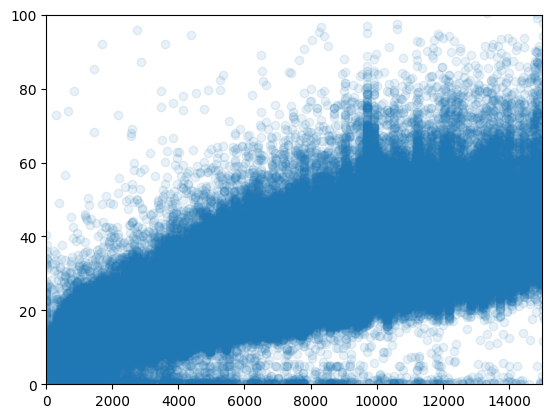

In [32]:
import matplotlib.pyplot as plt

plt.scatter(data['거리'],data['승차시간(분)'],alpha=0.1)
plt.ylim(0,100)
plt.xlim(0,15000)

(0.0, 15000.0)

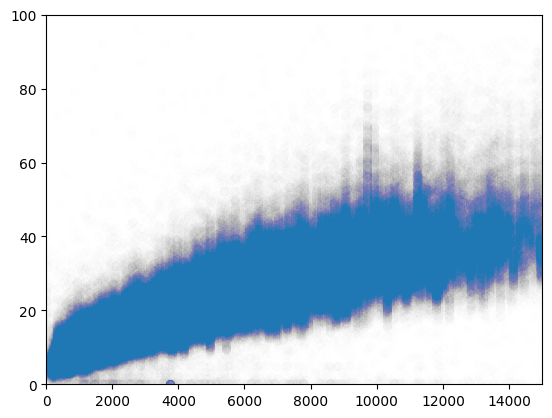

In [33]:
plt.scatter(data['거리'],data['승차시간(분)'],alpha=0.002)
plt.ylim(0,100)
plt.xlim(0,15000)

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing f

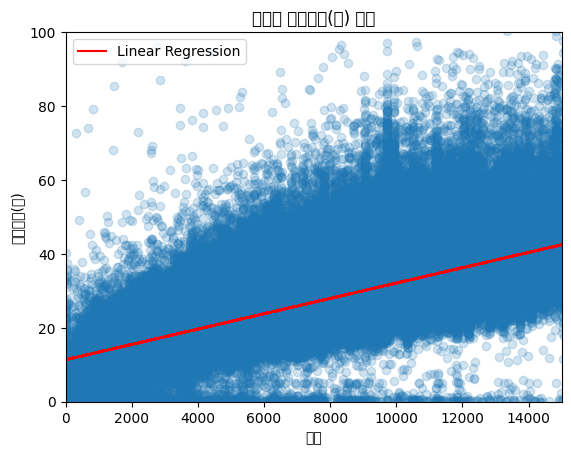

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 산점도 그리기
plt.scatter(data['거리'], data['승차시간(분)'], alpha=0.2)
plt.ylim(0, 100)
plt.xlim(0, 15000)

# 선형 회귀선 추가
slope, intercept, r_value, p_value, std_err = stats.linregress(data['거리'], data['승차시간(분)'])
regression_line = slope * data['거리'] + intercept
plt.plot(data['거리'], regression_line, color='red', label='Linear Regression')

plt.xlabel('거리')
plt.ylabel('승차시간(분)')
plt.title('거리와 승차시간(분) 관계')
plt.legend()
plt.show()

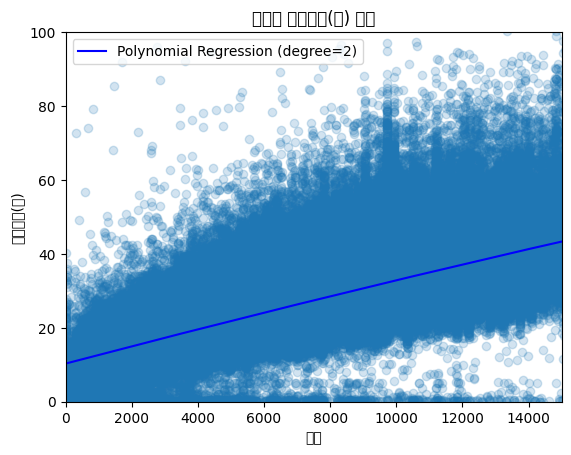

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# 산점도 그리기
plt.scatter(data['거리'], data['승차시간(분)'], alpha=0.2)
plt.ylim(0, 100)
plt.xlim(0, 15000)

# 다항 회귀 곡선 추가 (2차 다항식 예시)
p = Polynomial.fit(data['거리'], data['승차시간(분)'], 2)
plt.plot(*p.linspace(), color='blue', label='Polynomial Regression (degree=2)')

plt.xlabel('거리')
plt.ylabel('승차시간(분)')
plt.title('거리와 승차시간(분) 관계')
plt.legend()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_22268\3099961505.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_거리'] = np.log(data['거리'] + 1)  # 로그 변환 (0값 방지를 위해 +1)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from 

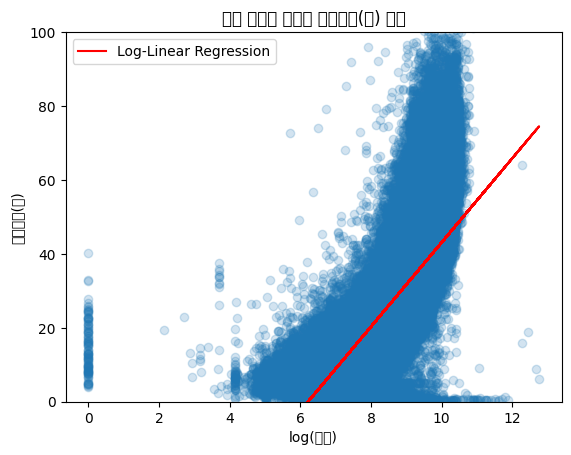

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44480 (\N{HANGUL SYLLABLE GWI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


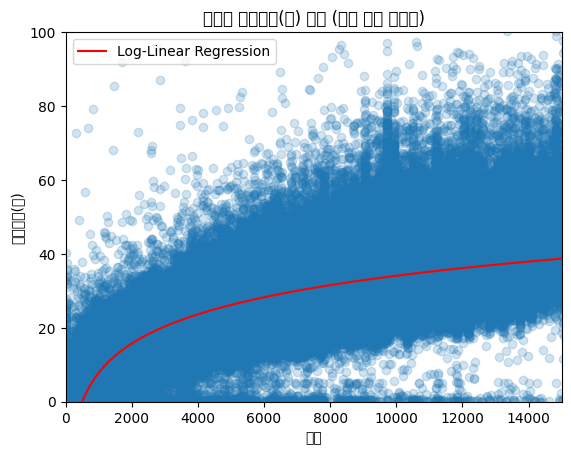

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 로그 변환
data['log_거리'] = np.log(data['거리'] + 1)  # 로그 변환 (0값 방지를 위해 +1)

# 산점도 그리기
plt.scatter(data['log_거리'], data['승차시간(분)'], alpha=0.2)
plt.ylim(0, 100)

# 로그 변환된 데이터로 선형 회귀선 추가
slope, intercept, r_value, p_value, std_err = stats.linregress(data['log_거리'], data['승차시간(분)'])
regression_line = slope * data['log_거리'] + intercept
plt.plot(data['log_거리'], regression_line, color='red', label='Log-Linear Regression')

plt.xlabel('log(거리)')
plt.ylabel('승차시간(분)')
plt.title('로그 변환된 거리와 승차시간(분) 관계')
plt.legend()
plt.show()

# 원래 스케일로 변환된 회귀선 그리기
plt.scatter(data['거리'], data['승차시간(분)'], alpha=0.2)
plt.ylim(0, 100)
plt.xlim(0, 15000)

# 원래 스케일의 회귀선 추가
original_scale_regression_line = slope * np.log(np.linspace(1, 15000, 500)) + intercept
plt.plot(np.linspace(1, 15000, 500), original_scale_regression_line, color='red', label='Log-Linear Regression')

plt.xlabel('거리')
plt.ylabel('승차시간(분)')
plt.title('거리와 승차시간(분) 관계 (로그 변환 회귀선)')
plt.legend()
plt.show()

In [37]:
# 회귀식 출력
print(f"로그 변환된 거리와 승차시간(분) 회귀식: 승차시간(분) = {slope:.4f} * log(거리) + {intercept:.4f}")

로그 변환된 거리와 승차시간(분) 회귀식: 승차시간(분) = 11.3978 * log(거리) + -70.8887


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from c

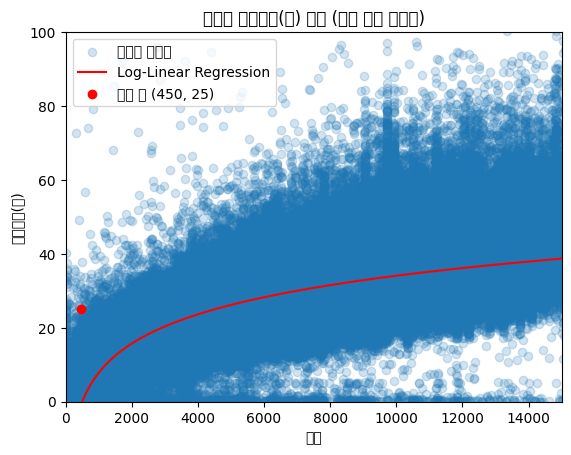

로그 변환된 거리와 승차시간(분) 회귀식: 승차시간(분) = 11.3978 * log(거리) + -70.8887


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 원래 스케일로 변환된 회귀선 그리기
plt.scatter(data['거리'], data['승차시간(분)'], alpha=0.2, label='데이터 포인트')
plt.ylim(0, 100)
plt.xlim(0, 15000)

# 원래 스케일의 회귀선 추가
original_scale_regression_line = slope * np.log(np.linspace(1, 15000, 500)) + intercept
plt.plot(np.linspace(1, 15000, 500), original_scale_regression_line, color='red', label='Log-Linear Regression')

# (450, 25)에 빨간색 점 추가 (원래 스케일)
plt.scatter([450], [25], color='red', zorder=5, label='특정 점 (450, 25)')

plt.xlabel('거리')
plt.ylabel('승차시간(분)')
plt.title('거리와 승차시간(분) 관계 (로그 변환 회귀선)')
plt.legend()
plt.show()

# 회귀식 출력
print(f"로그 변환된 거리와 승차시간(분) 회귀식: 승차시간(분) = {slope:.4f} * log(거리) + {intercept:.4f}")


Original data size: (638315, 25)
Filtered data size: (352078, 25)


C:\Users\user\AppData\Local\Temp\ipykernel_22268\3250438655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['예측_승차시간(분)'] = slope * np.log(data['거리'] + 1) + intercept
C:\Users\user\AppData\Local\Temp\ipykernel_22268\3250438655.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['오차'] = data['승차시간(분)'] - data['예측_승차시간(분)']
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  

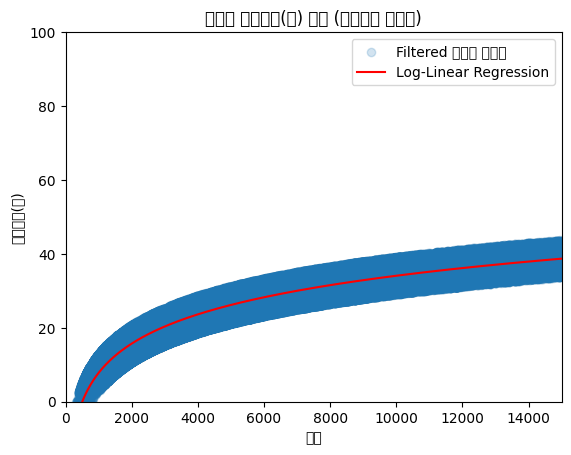

In [39]:
# 예측값 계산
data['예측_승차시간(분)'] = slope * np.log(data['거리'] + 1) + intercept

# 실제값과 예측값의 차이 계산
data['오차'] = data['승차시간(분)'] - data['예측_승차시간(분)']

# 오차가 ±25 범위 안에 있는 데이터 필터링
filtered_data = data[(data['오차'] >= -5) & (data['오차'] <= 5)]

# 필터링된 데이터 크기 출력
print(f"Original data size: {data.shape}")
print(f"Filtered data size: {filtered_data.shape}")

# 필터링된 데이터로 그래프 그리기
plt.scatter(filtered_data['거리'], filtered_data['승차시간(분)'], alpha=0.2, label='Filtered 데이터 포인트')
plt.ylim(0, 100)
plt.xlim(0, 15000)

# 원래 스케일의 회귀선 추가
plt.plot(np.linspace(1, 15000, 500), original_scale_regression_line, color='red', label='Log-Linear Regression')

plt.xlabel('거리')
plt.ylabel('승차시간(분)')
plt.title('거리와 승차시간(분) 관계 (필터링된 데이터)')
plt.legend()
plt.show()

In [40]:
# 오차가 ±25 범위 안에 있는 데이터 필터링
data = data[(data['오차'] >= -5) & (data['오차'] <= 5)]

In [41]:
data

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,...,승차시간(분),직선거리(km),주말,공휴일,접수시간,요일,거리,log_거리,예측_승차시간(분),오차
12,2020-01-01 05:06:44.297,1,부산 사상구,부산 사상구,489507,285817,491872,284227,2020-01-01 05:17:46.503,2020-01-01 05:48:05,...,17.383333,3210.950152,False,True,5,2,2849.793852,7.955353,19.784633,-2.401300
18,2020-01-01 05:57:06.427,1,부산 연제구,부산 사하구,498923,286584,487815,279035,2020-01-01 06:58:54.043,2020-01-01 07:19:54,...,35.283333,5120.670073,False,True,5,2,13430.378438,9.505349,37.451134,-2.167801
19,2020-01-01 06:21:30.313,1,부산 부산진구,부산 금정구,493723,285383,499594,297423,2020-01-01 06:56:44.463,2020-01-01 07:13:11,...,35.316667,16660.328522,False,True,6,2,13395.157371,9.502723,37.421207,-2.104540
22,2020-01-01 06:49:01.170,1,부산 해운대구,부산 북구,505443,293241,492608,290402,2020-01-01 07:10:24.970,2020-01-01 07:45:18,...,39.850000,9592.959955,False,True,6,2,13145.232824,9.483891,37.206556,2.643444
29,2020-01-01 07:21:12.460,1,부산 연제구,부산 연제구,498709,288151,496678,288085,2020-01-01 07:22:37.773,2020-01-01 07:38:28,...,12.966667,6441.659419,False,True,7,2,2032.072095,7.617303,15.931623,-2.964956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654868,2022-07-31 20:57:02.597,7,부산 중구,부산 서구,493884,277976,492542,279632,2022-07-31 20:57:26.190,2022-07-31 21:12:06,...,15.233333,16259.724146,True,False,20,6,2131.501818,7.665051,16.475842,-1.242508
654869,2022-07-31 21:13:08.880,7,부산 동래구,부산 해운대구,501300,288679,507568,286400,2022-07-31 21:34:29.647,2022-07-31 21:54:23,...,26.200000,3817.166239,True,False,21,6,6669.457624,8.805444,29.473775,-3.273775
654870,2022-07-31 21:35:45.633,7,부산 해운대구,부산 해운대구,506206,292715,509093,287693,2022-07-31 21:56:30.807,2022-07-31 22:25:08,...,28.300000,2075.931412,True,False,21,6,5792.689617,8.664525,27.867611,0.432389
654872,2022-07-31 21:53:21.040,7,부산 해운대구,부산 수영구,502745,286538,501997,285978,2022-07-31 22:53:10.877,2022-07-31 23:17:52,...,10.300000,16591.277118,True,False,21,6,934.400342,6.840975,7.083206,3.216794


- 성능을 높이기 위해 구간화

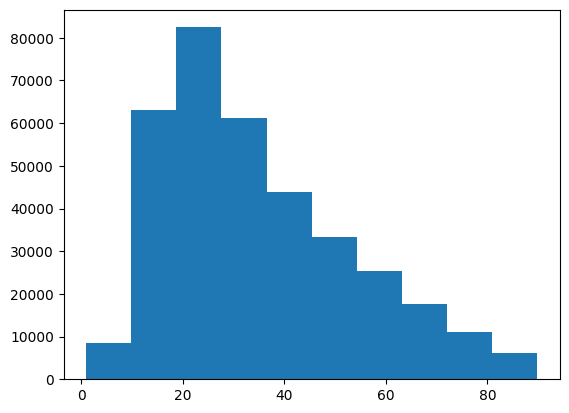

In [42]:
plt.hist(data['총대기시간(분)'])
plt.show()

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing fr

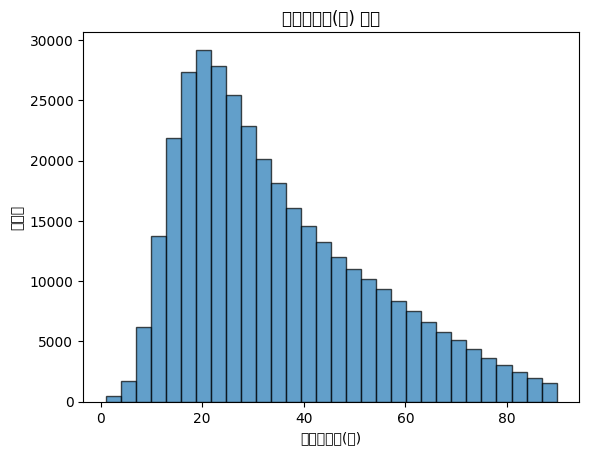

In [43]:
# '총대기시간(분)' 분포 확인
plt.hist(data['총대기시간(분)'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('총대기시간(분)')
plt.ylabel('빈도수')
plt.title('총대기시간(분) 분포')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2af5bda1520>,
 'caps': [<matplotlib.lines.Line2D at 0x2af5bda1a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2af5bda1280>],
 'medians': [<matplotlib.lines.Line2D at 0x2af5bda1fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2af5bdaf2b0>],
 'means': []}

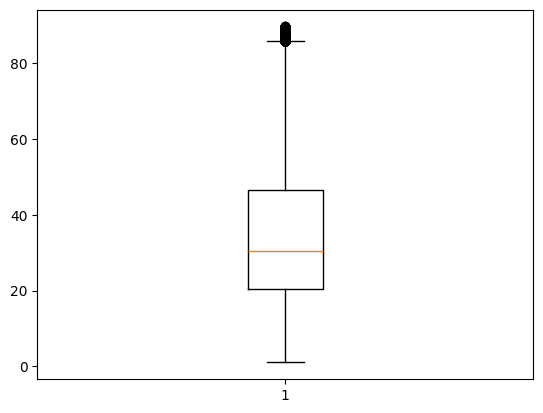

In [44]:
fig, ax = plt.subplots()
ax.boxplot(data['총대기시간(분)'])

In [45]:
max(data['총대기시간(분)'])

89.7715

In [46]:
min(data['총대기시간(분)'])

1.0084999999999997

구간 경계값:
[ 1.0085     20.43964167 30.49916667 46.6121375  89.7715    ]
각 구간의 비율:
대기시간_구간
짧다(20분 이내)      0.250001
보통이다(30분 정도)    0.250001
1시간 이상 걸림       0.250001
길다(40분 정도)      0.249996
Name: proportion, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_22268\1726553697.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['대기시간_구간'], bins = pd.qcut(data['총대기시간(분)'], 4, labels=['짧다(20분 이내)', '보통이다(30분 정도)', '길다(40분 정도)', '1시간 이상 걸림'], retbins=True)


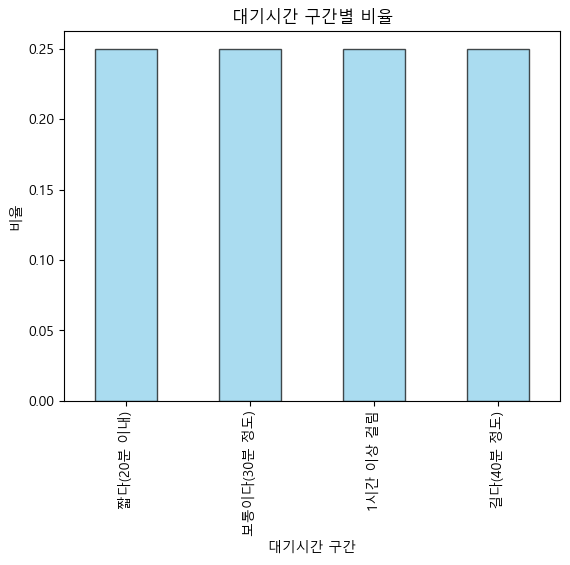

In [47]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# '총대기시간(분)'을 4개의 구간으로 나누기
data['대기시간_구간'], bins = pd.qcut(data['총대기시간(분)'], 4, labels=['짧다(20분 이내)', '보통이다(30분 정도)', '길다(40분 정도)', '1시간 이상 걸림'], retbins=True)

# 구간 경계값 출력
print("구간 경계값:")
print(bins)

# 각 구간의 비율 계산
구간_비율 = data['대기시간_구간'].value_counts(normalize=True)

# 결과 출력
print("각 구간의 비율:")
print(구간_비율)

# 각 구간의 비율 시각화
구간_비율.plot(kind='bar', color='skyblue', edgecolor='k', alpha=0.7)
plt.xlabel('대기시간 구간')
plt.ylabel('비율')
plt.title('대기시간 구간별 비율')
plt.show()

- 구간화 2

구간 경계값:
[0, 15, 40, 60, inf]
각 구간의 비율:
대기시간_구간
약 30분        0.557839
1시간 이내       0.215023
1시간 이상 걸림    0.121254
15분이내        0.105883
Name: proportion, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_9380\1607355005.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['대기시간_구간'] = pd.cut(data['총대기시간(분)'], bins=bins, labels=labels, right=False)


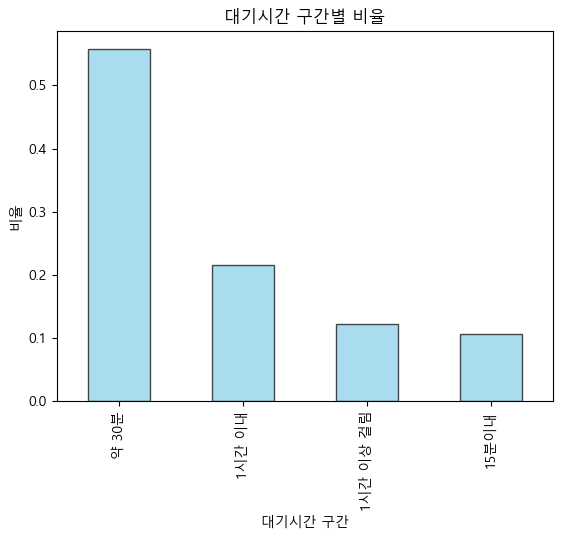

In [41]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 구간 경계 및 라벨 설정
bins = [0, 15, 40, 60, float('inf')]  # 구간 경계
labels=['15분이내', '약 30분', '1시간 이내', '1시간 이상 걸림']
# '총대기시간(분)'을 구간화
data['대기시간_구간'] = pd.cut(data['총대기시간(분)'], bins=bins, labels=labels, right=False)

# 구간 경계값 출력
print("구간 경계값:")
print(bins)

# 각 구간의 비율 계산
구간_비율 = data['대기시간_구간'].value_counts(normalize=True)

# 결과 출력
print("각 구간의 비율:")
print(구간_비율)

# 각 구간의 비율 시각화
구간_비율.plot(kind='bar', color='skyblue', edgecolor='k', alpha=0.7)
plt.xlabel('대기시간 구간')
plt.ylabel('비율')
plt.title('대기시간 구간별 비율')
plt.show()

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# SMOTE를 사용하여 각 열에 대해 데이터 증강
smote = SMOTE(sampling_strategy='auto', random_state=42)

# 결과를 저장할 데이터프레임 초기화
data_resampled = pd.DataFrame()

# 각 마약 종류에 대해 SMOTE 적용
for column in df_labels.columns:
    features_res, labels_res = smote.fit_resample(df_features, df_labels[column])
    if df_features_resampled.empty:
        df_features_resampled = pd.DataFrame(features_res, columns=df_features.columns)
    df_labels_resampled[column] = labels_res

# 증강된 데이터 확인
unique_value_counts_resampled = df_labels_resampled.apply(pd.Series.value_counts).fillna(0).astype(int)
print(unique_value_counts_resampled)

In [147]:
data

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,배차일시,승차일시,...,직선거리(km),주말,공휴일,접수시간,요일,거리,log_거리,예측_승차시간(분),오차,대기시간_구간
12,2020-01-01 05:06:44.297,1,부산광역시 사상구,부산광역시 사상구,489507,285817,491872,284227,2020-01-01 05:17:46.503,2020-01-01 05:48:05,...,3210.950152,False,True,5,2,2849.793852,7.955353,19.784633,-2.401300,1시간 이내
18,2020-01-01 05:57:06.427,1,부산광역시 연제구,부산광역시 사하구,498923,286584,487815,279035,2020-01-01 06:58:54.043,2020-01-01 07:19:54,...,5120.670073,False,True,5,2,13430.378438,9.505349,37.451134,-2.167801,1시간 이상 걸림
19,2020-01-01 06:21:30.313,1,부산광역시 부산진구,부산광역시 금정구,493723,285383,499594,297423,2020-01-01 06:56:44.463,2020-01-01 07:13:11,...,16660.328522,False,True,6,2,13395.157371,9.502723,37.421207,-2.104540,1시간 이내
22,2020-01-01 06:49:01.170,1,부산광역시 해운대구,부산광역시 북구,505443,293241,492608,290402,2020-01-01 07:10:24.970,2020-01-01 07:45:18,...,9592.959955,False,True,6,2,13145.232824,9.483891,37.206556,2.643444,1시간 이내
29,2020-01-01 07:21:12.460,1,부산광역시 연제구,부산광역시 연제구,498709,288151,496678,288085,2020-01-01 07:22:37.773,2020-01-01 07:38:28,...,6441.659419,False,True,7,2,2032.072095,7.617303,15.931623,-2.964956,약 30분
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654868,2022-07-31 20:57:02.597,7,부산광역시 중구,부산광역시 서구,493884,277976,492542,279632,2022-07-31 20:57:26.190,2022-07-31 21:12:06,...,16259.724146,True,False,20,6,2131.501818,7.665051,16.475842,-1.242508,약 30분
654869,2022-07-31 21:13:08.880,7,부산광역시 동래구,부산광역시 해운대구,501300,288679,507568,286400,2022-07-31 21:34:29.647,2022-07-31 21:54:23,...,3817.166239,True,False,21,6,6669.457624,8.805444,29.473775,-3.273775,1시간 이내
654870,2022-07-31 21:35:45.633,7,부산광역시 해운대구,부산광역시 해운대구,506206,292715,509093,287693,2022-07-31 21:56:30.807,2022-07-31 22:25:08,...,2075.931412,True,False,21,6,5792.689617,8.664525,27.867611,0.432389,1시간 이내
654872,2022-07-31 21:53:21.040,7,부산광역시 해운대구,부산광역시 수영구,502745,286538,501997,285978,2022-07-31 22:53:10.877,2022-07-31 23:17:52,...,16591.277118,True,False,21,6,934.400342,6.840975,7.083206,3.216794,1시간 이상 걸림


- 구간화 3

구간 경계값:
[0, 15, 40, inf]
각 구간의 비율:
대기시간_구간
약 30분        0.557839
1시간 이상 걸림    0.336278
15분이내        0.105883
Name: proportion, dtype: float64


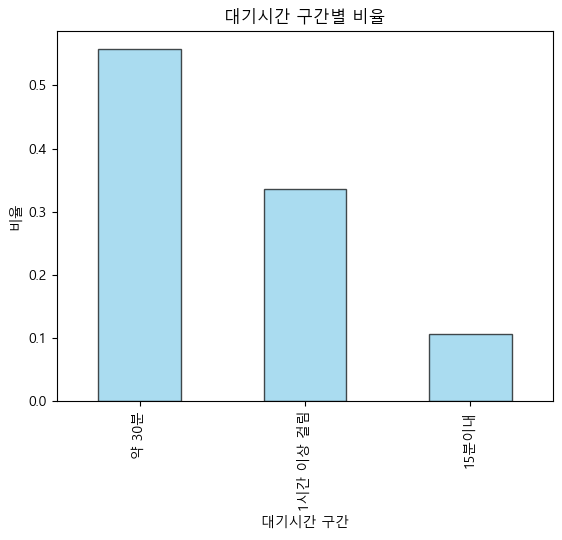

In [167]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 구간 경계 및 라벨 설정
bins = [0, 15, 40, float('inf')]  # 구간 경계
labels=['15분이내', '약 30분', '1시간 이상 걸림']
# '총대기시간(분)'을 구간화
data['대기시간_구간'] = pd.cut(data['총대기시간(분)'], bins=bins, labels=labels, right=False)

# 구간 경계값 출력
print("구간 경계값:")
print(bins)

# 각 구간의 비율 계산
구간_비율 = data['대기시간_구간'].value_counts(normalize=True)

# 결과 출력
print("각 구간의 비율:")
print(구간_비율)

# 각 구간의 비율 시각화
구간_비율.plot(kind='bar', color='skyblue', edgecolor='k', alpha=0.7)
plt.xlabel('대기시간 구간')
plt.ylabel('비율')
plt.title('대기시간 구간별 비율')
plt.show()

- 구간화4

구간 경계값:
[0, 15, 45, inf]
각 구간의 비율:
대기시간_구간
약 30분        0.624637
1시간 이상 걸림    0.269480
15분이내        0.105883
Name: proportion, dtype: float64


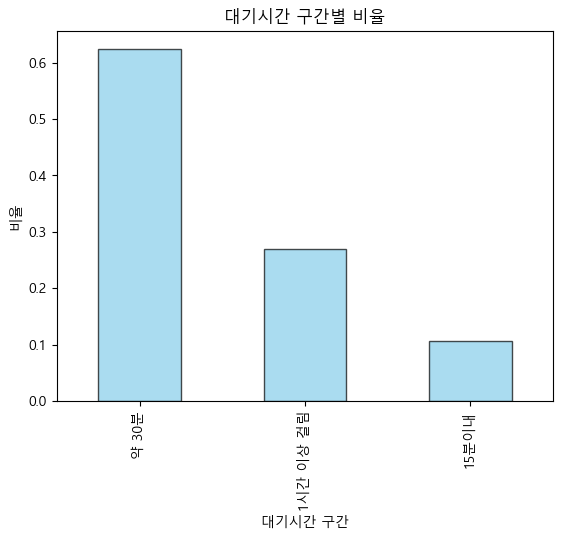

In [188]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 구간 경계 및 라벨 설정
bins = [0, 15, 45, float('inf')]  # 구간 경계
labels=['15분이내', '약 30분', '1시간 이상 걸림']
# '총대기시간(분)'을 구간화
data['대기시간_구간'] = pd.cut(data['총대기시간(분)'], bins=bins, labels=labels, right=False)

# 구간 경계값 출력
print("구간 경계값:")
print(bins)

# 각 구간의 비율 계산
구간_비율 = data['대기시간_구간'].value_counts(normalize=True)

# 결과 출력
print("각 구간의 비율:")
print(구간_비율)

# 각 구간의 비율 시각화
구간_비율.plot(kind='bar', color='skyblue', edgecolor='k', alpha=0.7)
plt.xlabel('대기시간 구간')
plt.ylabel('비율')
plt.title('대기시간 구간별 비율')
plt.show()

- 구간화5 이후

구간 경계값:
[0, 15, 30, 50, inf]
각 구간의 비율:
대기시간_구간
15분 ~ 30분    0.383389
30분 ~ 50분    0.298175
1시간 이상 걸림    0.212552
15분이내        0.105883
Name: proportion, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_22268\2724270310.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['대기시간_구간'] = pd.cut(data['총대기시간(분)'], bins=bins, labels=labels, right=False)


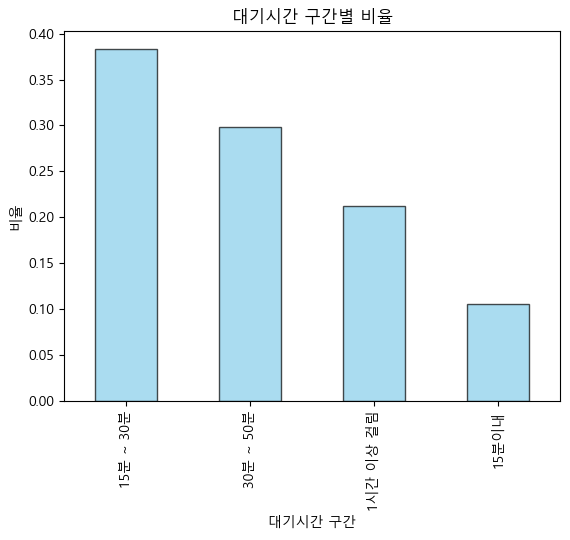

In [50]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 구간 경계 및 라벨 설정
bins = [0, 15, 30, 50, float('inf')]  # 구간 경계
labels=['15분이내', '15분 ~ 30분', '30분 ~ 50분', '1시간 이상 걸림']
# '총대기시간(분)'을 구간화
data['대기시간_구간'] = pd.cut(data['총대기시간(분)'], bins=bins, labels=labels, right=False)

# 구간 경계값 출력
print("구간 경계값:")
print(bins)

# 각 구간의 비율 계산
구간_비율 = data['대기시간_구간'].value_counts(normalize=True)

# 결과 출력
print("각 구간의 비율:")
print(구간_비율)

# 각 구간의 비율 시각화
구간_비율.plot(kind='bar', color='skyblue', edgecolor='k', alpha=0.7)
plt.xlabel('대기시간 구간')
plt.ylabel('비율')
plt.title('대기시간 구간별 비율')
plt.show()

### 불필요한 열 제거

In [51]:
data.columns

Index(['접수일시', '월', '출발지역', '목적지역', '호출지경도', '호출지위도', '목적지경도', '목적지위도', '배차일시',
       '승차일시', '하차일시', '요금', '배차대기시간(분)', '승차대기시간(분)', '총대기시간(분)', '승차시간(분)',
       '직선거리(km)', '주말', '공휴일', '접수시간', '요일', '거리', 'log_거리', '예측_승차시간(분)',
       '오차', '대기시간_구간'],
      dtype='object')

In [52]:
data=data.drop(['배차일시', '승차일시', '하차일시', '요금', '배차대기시간(분)', '승차대기시간(분)',
 '승차시간(분)', '직선거리(km)', '거리', 'log_거리', '예측_승차시간(분)','오차'],axis=1)

In [53]:
data

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,총대기시간(분),주말,공휴일,접수시간,요일,대기시간_구간
12,2020-01-01 05:06:44.297,1,부산 사상구,부산 사상구,489507,285817,491872,284227,41.345050,False,True,5,2,30분 ~ 50분
18,2020-01-01 05:57:06.427,1,부산 연제구,부산 사하구,498923,286584,487815,279035,82.792883,False,True,5,2,1시간 이상 걸림
19,2020-01-01 06:21:30.313,1,부산 부산진구,부산 금정구,493723,285383,499594,297423,51.678117,False,True,6,2,1시간 이상 걸림
22,2020-01-01 06:49:01.170,1,부산 해운대구,부산 북구,505443,293241,492608,290402,56.280500,False,True,6,2,1시간 이상 걸림
29,2020-01-01 07:21:12.460,1,부산 연제구,부산 연제구,498709,288151,496678,288085,17.259000,False,True,7,2,15분 ~ 30분
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654868,2022-07-31 20:57:02.597,7,부산 중구,부산 서구,493884,277976,492542,279632,15.056717,True,False,20,6,15분 ~ 30분
654869,2022-07-31 21:13:08.880,7,부산 동래구,부산 해운대구,501300,288679,507568,286400,41.235333,True,False,21,6,30분 ~ 50분
654870,2022-07-31 21:35:45.633,7,부산 해운대구,부산 해운대구,506206,292715,509093,287693,49.372783,True,False,21,6,30분 ~ 50분
654872,2022-07-31 21:53:21.040,7,부산 해운대구,부산 수영구,502745,286538,501997,285978,84.516000,True,False,21,6,1시간 이상 걸림


### SHAP를 위한 간단 인코딩

In [54]:
import pandas as pd
import numpy as np
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 데이터 준비
data_encoded = data.copy()  # data 변수를 사용

# 접수일시에서 초와 년도 제거
data_encoded['접수일시'] = data_encoded['접수일시'].dt.strftime('%m-%d %H:%M')

# 주말과 공휴일을 숫자로 변환 (True: 1, False: 0)
data_encoded['주말'] = data_encoded['주말'].astype(int)
data_encoded['공휴일'] = data_encoded['공휴일'].astype(int)

# 범주형 변수 레이블 인코딩
label_encoders = {}
categorical_columns = ['출발지역', '목적지역', '접수일시', '대기시간_구간']  # 범주형 변수 목록

for col in categorical_columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le

In [55]:
data_encoded

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,총대기시간(분),주말,공휴일,접수시간,요일,대기시간_구간
12,10,1,12,12,489507,285817,491872,284227,41.345050,0,1,5,2,3
18,11,1,16,13,498923,286584,487815,279035,82.792883,0,1,5,2,2
19,14,1,10,5,493723,285383,499594,297423,51.678117,0,1,6,2,2
22,16,1,19,11,505443,293241,492608,290402,56.280500,0,1,6,2,2
29,21,1,16,16,498709,288151,496678,288085,17.259000,0,1,7,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654868,122125,7,18,14,493884,277976,492542,279632,15.056717,1,0,20,6,0
654869,122126,7,9,19,501300,288679,507568,286400,41.235333,1,0,21,6,3
654870,122129,7,19,19,506206,292715,509093,287693,49.372783,1,0,21,6,3
654872,122131,7,19,15,502745,286538,501997,285978,84.516000,1,0,21,6,2


### X,Y 변수 분리

In [56]:
# X 변수와 Y 변수 분리
Y = data_encoded['대기시간_구간']
data_encoded = data_encoded.drop(columns=['총대기시간(분)', '대기시간_구간'])

In [57]:
data_encoded

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,주말,공휴일,접수시간,요일
12,10,1,12,12,489507,285817,491872,284227,0,1,5,2
18,11,1,16,13,498923,286584,487815,279035,0,1,5,2
19,14,1,10,5,493723,285383,499594,297423,0,1,6,2
22,16,1,19,11,505443,293241,492608,290402,0,1,6,2
29,21,1,16,16,498709,288151,496678,288085,0,1,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...
654868,122125,7,18,14,493884,277976,492542,279632,1,0,20,6
654869,122126,7,9,19,501300,288679,507568,286400,1,0,21,6
654870,122129,7,19,19,506206,292715,509093,287693,1,0,21,6
654872,122131,7,19,15,502745,286538,501997,285978,1,0,21,6


In [58]:
Y

12        3
18        2
19        2
22        2
29        0
         ..
654868    0
654869    3
654870    3
654872    2
654873    0
Name: 대기시간_구간, Length: 352078, dtype: int32

### 변수 스케일링

- 이상치 많은지 확인 => 많다면 Robustscaler 사용!
- => 결과 : 이상치 많았음 (아래 참고)

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# 데이터 프레임에서 수치형 데이터 추출
numerical_data = data.select_dtypes(include=[np.number])

# 이상치 개수 확인
outlier_counts = {}
for column in numerical_data.columns:
    q1 = numerical_data[column].quantile(0.25)
    q3 = numerical_data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = numerical_data[(numerical_data[column] < lower_bound) | (numerical_data[column] > upper_bound)]
    outlier_counts[column] = len(outliers)

# 이상치 개수 출력
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Variable', 'Outlier Count'])
outlier_counts_df

,Variable,Outlier Count
0,월,0
1,호출지경도,4744
2,호출지위도,5965
3,목적지경도,7797
4,목적지위도,8200
5,총대기시간(분),2152
6,접수시간,2371
7,요일,0


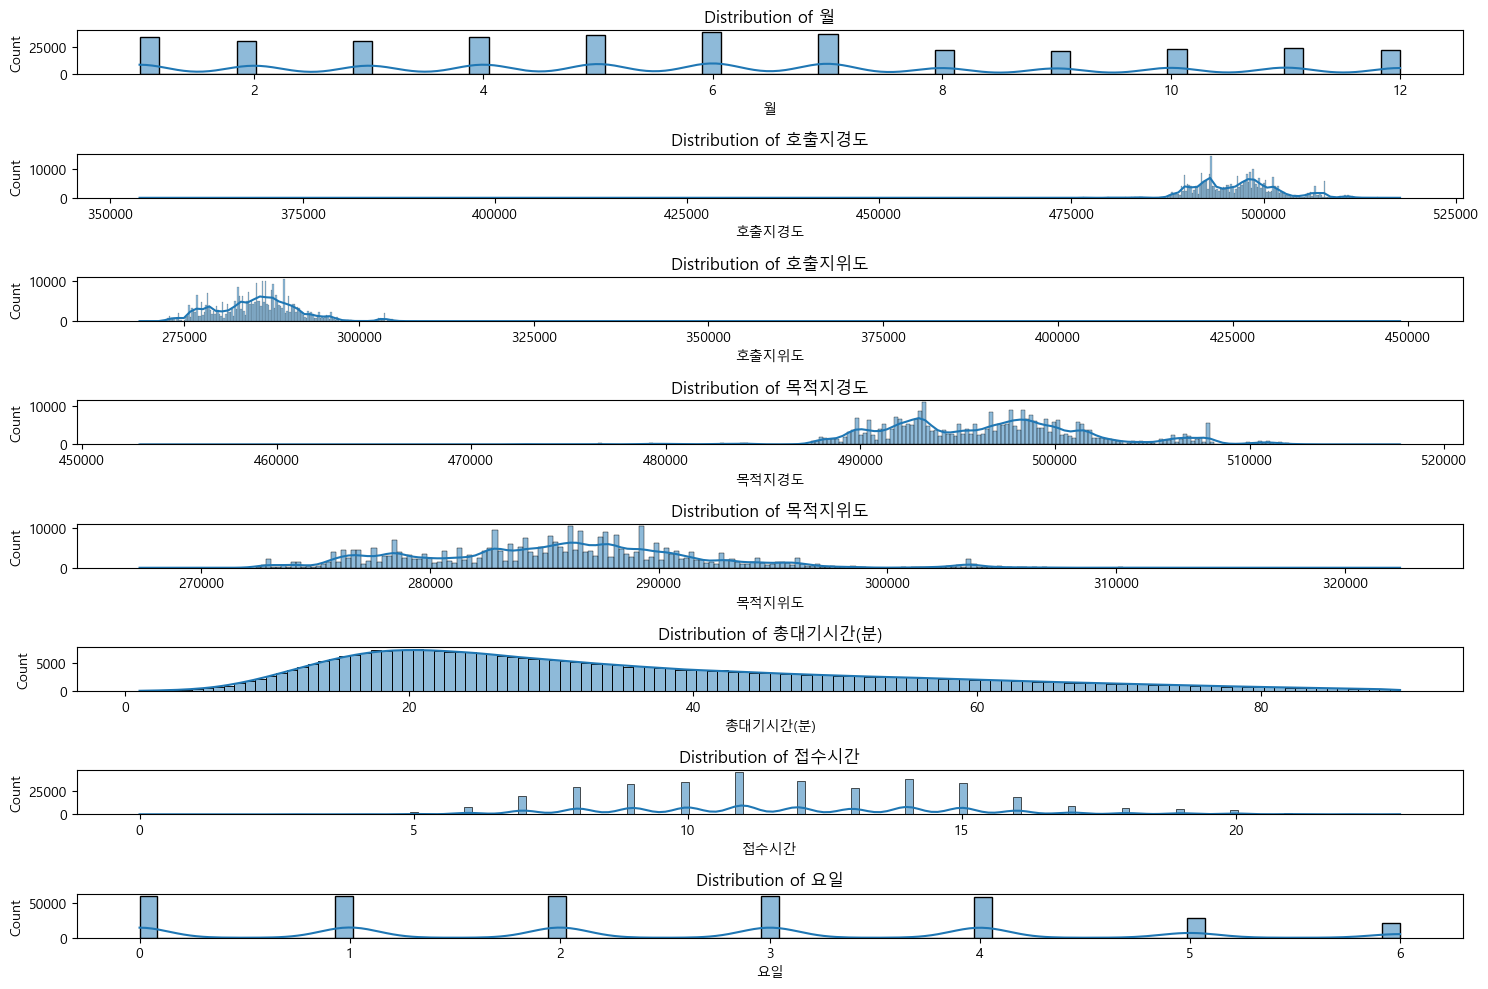

In [60]:
# 정규분포 시각화
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_data.columns):
    plt.subplot(len(numerical_data.columns), 1, i + 1)
    sns.histplot(numerical_data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

1) 월:
데이터가 균등하게 분포되어 있으며, 명확한 이상치는 보이지 않습니다.

2) 호출지경도:
데이터가 특정 범위에 집중되어 있으며, 극단적인 값이 일부 존재합니다. 이상치가 상대적으로 많이 존재할 가능성이 있습니다.

3) 호출지위도:
데이터가 특정 범위에 집중되어 있으며, 극단적인 값이 일부 존재합니다. 이상치가 상대적으로 많이 존재할 가능성이 있습니다.

4) 목적지경도:
데이터가 특정 범위에 집중되어 있으며, 극단적인 값이 일부 존재합니다. 이상치가 상대적으로 많이 존재할 가능성이 있습니다.

5) 목적지위도:
데이터가 특정 범위에 집중되어 있으며, 극단적인 값이 일부 존재합니다. 이상치가 상대적으로 많이 존재할 가능성이 있습니다.

6) 총대기시간(분):
데이터가 한쪽으로 치우친 분포를 보이고 있습니다. 일부 극단적인 값이 존재하여 이상치가 있을 가능성이 있습니다.

7) 접수시간:
데이터가 주기적인 분포를 보이고 있습니다. 이상치가 거의 없을 가능성이 큽니다.

8) 요일:
데이터가 균등하게 분포되어 있으며, 명확한 이상치는 보이지 않습니다.

9) 대기시간:
데이터가 한쪽으로 치우친 분포를 보이고 있으며, 일부 극단적인 값이 존재하여 이상치가 있을 가능성이 있습니다.

10) 접수일시_년초제거_코드:
데이터가 균등하게 분포되어 있으며, 명확한 이상치는 보이지 않습니다.

- 방법 1. RobustScaler

In [60]:
from sklearn.preprocessing import RobustScaler

# 스케일링할 컬럼 선택 (이진 인코딩 및 원-핫 인코딩된 컬럼을 제외한 나머지)
columns_to_scale = data_encoded.select_dtypes(include=[np.number]).columns

# RobustScaler 적용
scaler = RobustScaler()
data_scaled = data_encoded.copy()
data_scaled[columns_to_scale] = scaler.fit_transform(data_encoded[columns_to_scale])

In [61]:
data_scaled

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,주말,공휴일,접수시간,요일
12,-1.007928,-0.833333,0.000000,0.000000,-1.008529,0.031392,-0.669266,-0.202845,0.0,1.0,-1.4,0.000000
18,-1.007916,-0.833333,0.571429,0.142857,0.308026,0.130886,-1.234229,-0.868145,0.0,1.0,-1.4,0.000000
19,-1.007883,-0.833333,-0.285714,-1.000000,-0.419044,-0.024906,0.406072,1.488083,0.0,1.0,-1.2,0.000000
22,-1.007861,-0.833333,1.000000,-0.142857,1.219659,0.994422,-0.566773,0.588416,0.0,1.0,-1.2,0.000000
29,-1.007806,-0.833333,0.571429,0.571429,0.278104,0.334155,0.000000,0.291517,0.0,1.0,-1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
654868,0.342712,0.166667,0.857143,0.285714,-0.396532,-0.985731,-0.575964,-0.791645,1.0,0.0,1.6,1.333333
654869,0.342723,0.166667,-0.428571,1.000000,0.640380,0.402646,1.516502,0.075602,1.0,0.0,1.8,1.333333
654870,0.342756,0.166667,1.000000,1.000000,1.326342,0.926190,1.728868,0.241287,1.0,0.0,1.8,1.333333
654872,0.342778,0.166667,1.000000,0.428571,0.842422,0.124919,0.740705,0.021527,1.0,0.0,1.8,1.333333


In [49]:
# 스케일링된 데이터프레임을 엑셀 파일로 저장
#data_scaled.to_excel('final_prepro_scaled_두리발_data.xlsx', index=False)

- 방법2. Box-Cox 변환(정규화) 후 StandardScaler(표준화)

- 정규 분포 따르는지 확인 => 따른다면 standard scaler 사용!
- 결과 : 정규분포 따르지 않음(아래 결과값 참고. p-value가 0.05보다 작으면, 해당 변수는 정규분포를 따르지 않음) => Box-Cox 변환(정규화) 후 StandardScaler(표준화)

In [50]:
# # 정규분포 검정 (Shapiro-Wilk test)
# shapiro_results = numerical_data.apply(lambda x: shapiro(x.dropna()) if x.dtype != 'O' else None)

# # Shapiro-Wilk test 결과 출력
# shapiro_results_summary = shapiro_results.apply(lambda x: {'Statistic': x[0], 'p-value': x[1]} if x is not None else None)
# shapiro_results_summary = pd.DataFrame(shapiro_results_summary.tolist(), index=numerical_data.columns)

# shapiro_results_summary

In [51]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy.stats import probplot

# # 정규분포 시각화를 위한 Q-Q 플롯 및 히스토그램
# plt.figure(figsize=(15, 20))

# for i, column in enumerate(numerical_data.columns):
#     plt.subplot(len(numerical_data.columns), 2, 2 * i + 1)
#     sns.histplot(numerical_data[column], kde=True)
#     plt.title(f'Histogram and KDE of {column}')
    
#     plt.subplot(len(numerical_data.columns), 2, 2 * i + 2)
#     probplot(numerical_data[column].dropna(), dist="norm", plot=plt)
#     plt.title(f'Q-Q Plot of {column}')

# plt.tight_layout()
# plt.show()

- Box-Cox 변환(정규화) 후 StandardScaler(표준화)
1) Box-Cox 변환(정규화)

In [52]:
# import pandas as pd
# import numpy as np
# from scipy.stats import boxcox
# from sklearn.preprocessing import StandardScaler

# # Box-Cox 변환을 위한 함수
# def boxcox_transform(data):
#     # 데이터가 양수인지 확인
#     if np.any(data <= 0):
#         data = data - np.min(data) + 1
#     return boxcox(data)[0]

# # 수치형 변수를 선택
# numerical_features = data_encoded.select_dtypes(include=[np.number])

# # Box-Cox 변환 적용
# numerical_features_transformed = numerical_features.copy()
# for column in numerical_features.columns:
#     try:
#         numerical_features_transformed[column] = boxcox_transform(numerical_features[column])
#     except Exception as e:
#         print(f"Box-Cox 변환 중 오류 발생: {column}, 오류 메시지: {e}")

2) StandardScaler(표준화)

In [53]:
# # 변환된 수치형 변수와 나머지 변수를 결합
# data_transformed = data_encoded.copy()
# data_transformed[numerical_features.columns] = numerical_features_transformed

# # StandardScaler 적용
# scaler = StandardScaler()
# data_scaled2 = data_transformed.copy()
# data_scaled2[numerical_features.columns] = scaler.fit_transform(data_transformed[numerical_features.columns])

# # 결과 확인
# print(data_scaled2.head())

In [54]:
# data_scaled2

In [55]:
# data_scaled2.to_excel('final2_prepro_scaled_두리발_data.xlsx', index=False)

### VIF 계산하여 다중공선성 제거

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산 함수
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Feature"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

# VIF 계산 및 출력
vif = calculate_vif(data_scaled)
print("VIF before removing features:")
print(vif)

# VIF가 10을 초과하는 변수 제거
while vif["VIF"].max() > 10:
    highest_vif_feature = vif.sort_values("VIF", ascending=False)["Feature"].iloc[0]
    print(f"Removing feature with highest VIF: {highest_vif_feature}")
    data_scaled_2 = data_scaled.drop(columns=[highest_vif_feature])
    vif = calculate_vif(data_scaled_2)

VIF before removing features:
   Feature        VIF
0     접수일시  93.388777
1        월  93.394010
2     출발지역   1.384384
3     목적지역   1.561559
4    호출지경도   2.014629
5    호출지위도   1.983687
6    목적지경도   2.038564
7    목적지위도   2.039394
8       주말   1.982037
9      공휴일   1.016842
10    접수시간   1.007584
11      요일   1.955034
Removing feature with highest VIF: 월


In [63]:
data_scaled = data_scaled.drop(columns=['접수일시'])

In [64]:
data_scaled

,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,주말,공휴일,접수시간,요일
12,-0.833333,0.000000,0.000000,-1.008529,0.031392,-0.669266,-0.202845,0.0,1.0,-1.4,0.000000
18,-0.833333,0.571429,0.142857,0.308026,0.130886,-1.234229,-0.868145,0.0,1.0,-1.4,0.000000
19,-0.833333,-0.285714,-1.000000,-0.419044,-0.024906,0.406072,1.488083,0.0,1.0,-1.2,0.000000
22,-0.833333,1.000000,-0.142857,1.219659,0.994422,-0.566773,0.588416,0.0,1.0,-1.2,0.000000
29,-0.833333,0.571429,0.571429,0.278104,0.334155,0.000000,0.291517,0.0,1.0,-1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
654868,0.166667,0.857143,0.285714,-0.396532,-0.985731,-0.575964,-0.791645,1.0,0.0,1.6,1.333333
654869,0.166667,-0.428571,1.000000,0.640380,0.402646,1.516502,0.075602,1.0,0.0,1.8,1.333333
654870,0.166667,1.000000,1.000000,1.326342,0.926190,1.728868,0.241287,1.0,0.0,1.8,1.333333
654872,0.166667,1.000000,0.428571,0.842422,0.124919,0.740705,0.021527,1.0,0.0,1.8,1.333333


### 피처 셀렉션 - SHAP(SHapley Additive exPlanations)

In [66]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap
import time
from joblib import Parallel, delayed

In [162]:
# 데이터프레임이 숫자형 데이터로만 구성되어 있는지 확인 및 원-핫 인코딩
X_encoded = pd.get_dummies(data_scaled, drop_first=True)

# 모든 피처가 숫자형 데이터인지 확인
print(X_encoded.dtypes)
if not X_encoded.select_dtypes(include=[object]).empty:
    raise ValueError("데이터셋에 여전히 숫자가 아닌 열이 있습니다.")

월        float64
출발지역     float64
목적지역     float64
호출지경도    float64
호출지위도    float64
목적지경도    float64
목적지위도    float64
주말       float64
공휴일      float64
접수시간     float64
요일       float64
dtype: object


In [163]:
X_encoded

,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,주말,공휴일,접수시간,요일
12,-0.833333,0.000000,0.000000,-1.008529,0.031392,-0.669266,-0.202845,0.0,1.0,-1.4,0.000000
18,-0.833333,0.571429,0.142857,0.308026,0.130886,-1.234229,-0.868145,0.0,1.0,-1.4,0.000000
19,-0.833333,-0.285714,-1.000000,-0.419044,-0.024906,0.406072,1.488083,0.0,1.0,-1.2,0.000000
22,-0.833333,1.000000,-0.142857,1.219659,0.994422,-0.566773,0.588416,0.0,1.0,-1.2,0.000000
29,-0.833333,0.571429,0.571429,0.278104,0.334155,0.000000,0.291517,0.0,1.0,-1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
654868,0.166667,0.857143,0.285714,-0.396532,-0.985731,-0.575964,-0.791645,1.0,0.0,1.6,1.333333
654869,0.166667,-0.428571,1.000000,0.640380,0.402646,1.516502,0.075602,1.0,0.0,1.8,1.333333
654870,0.166667,1.000000,1.000000,1.326342,0.926190,1.728868,0.241287,1.0,0.0,1.8,1.333333
654872,0.166667,1.000000,0.428571,0.842422,0.124919,0.740705,0.021527,1.0,0.0,1.8,1.333333


In [69]:
from sklearn.ensemble import RandomForestClassifier

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

# 모델 초기화 및 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [70]:
# SHAP 설명자 초기화
explainer = shap.TreeExplainer(model)

# 테스트 세트의 샘플로 SHAP 값 계산
X_sample = X_test.sample(n=100, random_state=42)

In [71]:
# 병렬로 SHAP 값 계산
def calculate_shap_value(row):
    return explainer.shap_values(row)

shap_values = Parallel(n_jobs=-1)(delayed(calculate_shap_value)(row) for _, row in X_sample.iterrows())

In [72]:
# SHAP 값을 배열 형식으로 변환
shap_values = np.array(shap_values)

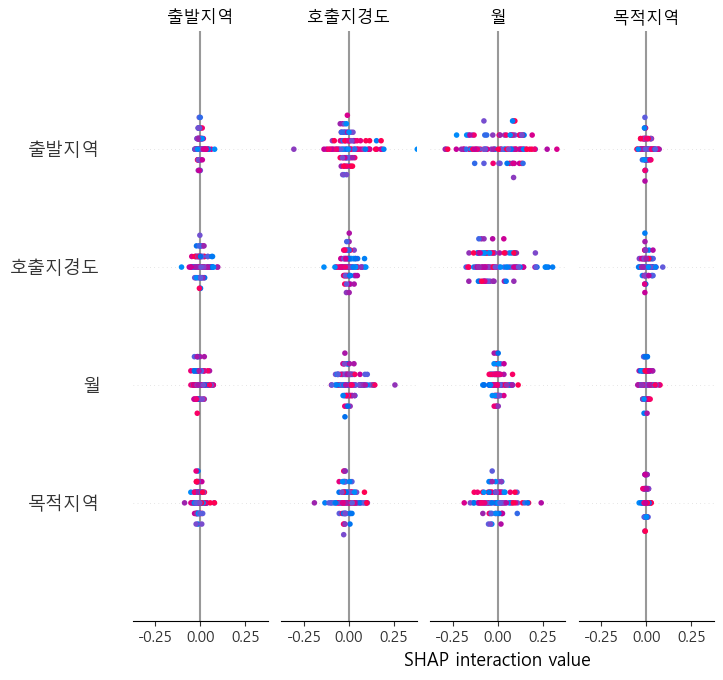

In [73]:
# SHAP 값의 요약 그래프
shap.summary_plot(shap_values, X_sample, plot_type="bar")

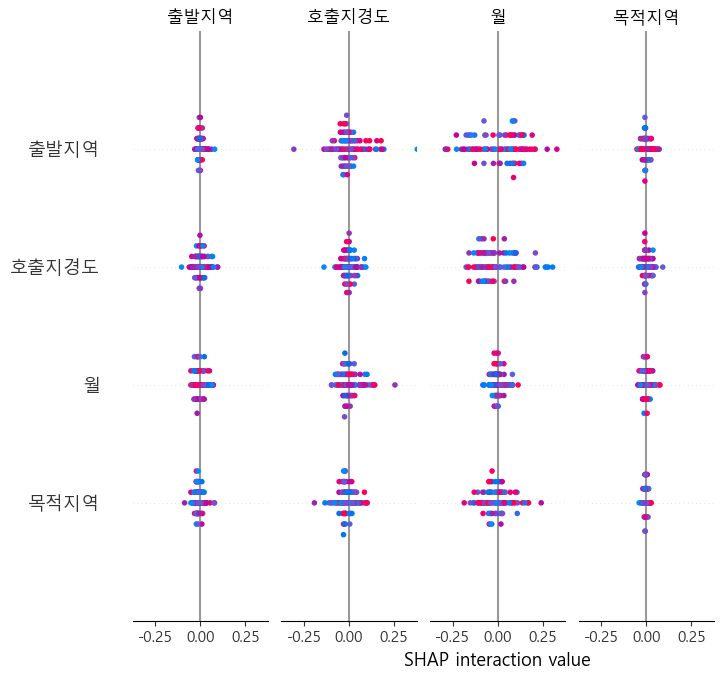

In [74]:
# 상세 SHAP 요약 그래프
shap.summary_plot(shap_values, X_sample)

In [75]:
# SHAP 값을 배열 형식으로 변환
shap_values = np.array(shap_values)
# 클래스별로 SHAP 값을 합산하여 평균 절대 SHAP 값 계산
mean_abs_shap_values = np.mean(np.abs(shap_values).sum(axis=0), axis=0)

In [76]:
# 각 피처에 대한 평균 절대 SHAP 값 계산
shap_importance = pd.DataFrame(list(zip(X_sample.columns, mean_abs_shap_values)), columns=['Feature', 'SHAP Importance'])
shap_importance = shap_importance.sort_values(by='SHAP Importance', ascending=False)

In [77]:
# 결과 출력
print(shap_importance.head(5))

  Feature  SHAP Importance
1    출발지역         2.891216
3   호출지경도         2.573813
0       월         1.819645
2    목적지역         1.737309


In [78]:
# 상위 피처 선택(중복 제거)
top_features = shap_importance['Feature'].drop_duplicates().head(9).values
print("SHAP 값 기반 상위 피처: ", top_features)

SHAP 값 기반 상위 피처:  ['출발지역' '호출지경도' '월' '목적지역']


In [79]:
# 선택된 피처로 최종 데이터셋 생성
X_selected = X_encoded[top_features]

### 모델 학습 및 평가

In [80]:
# 선택된 피처로 학습 데이터와 테스트 데이터 재생성
X_selected_train = X_train[top_features]
X_selected_test = X_test[top_features]

In [81]:
# 새로운 모델 초기화 및 학습
selected_model = RandomForestRegressor(n_estimators=100, random_state=42)
selected_model.fit(X_selected_train, Y_train)

RandomForestRegressor(random_state=42)

In [82]:
# 모델 평가
train_score = selected_model.score(X_selected_train, Y_train)
test_score = selected_model.score(X_selected_test, Y_test)

print("Train Score: ", train_score)
print("Test Score: ", test_score)

Train Score:  0.41494874757583455
Test Score:  -0.05238301018068969


- 모델의 학습 점수와 테스트 점수 간의 차이가 상당히 큼
- 모델이 학습 데이터에 과적합(overfitting)되어 테스트 데이터에서의 일반화 성능이 떨어짐

### 7가지 기본 모델 학습 및 평가

### 분류

In [83]:
# 선택된 피처로 학습 데이터와 테스트 데이터 재생성
X_selected_train = X_train[top_features]
X_selected_test = X_test[top_features]

In [89]:
X_selected_train = X_train
X_selected_test = X_test

In [84]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 모델 리스트
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "XGBoost Classifier": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 결과를 저장할 데이터프레임
results = pd.DataFrame(columns=["Model", "Train Accuracy", "Test Accuracy", "Train Precision", "Test Precision", "Train Recall", "Test Recall", "Train F1 Score", "Test F1 Score"])

# 모델 학습 및 평가
for model_name, model in models.items():
    # 교차 검증을 사용한 평가 (학습 데이터)
    train_accuracy = cross_val_score(model, X_selected_train, Y_train, cv=5, scoring='accuracy').mean()
    train_precision = cross_val_score(model, X_selected_train, Y_train, cv=5, scoring='precision_weighted').mean()
    train_recall = cross_val_score(model, X_selected_train, Y_train, cv=5, scoring='recall_weighted').mean()
    train_f1 = cross_val_score(model, X_selected_train, Y_train, cv=5, scoring='f1_weighted').mean()
    
    # 모델 학습
    model.fit(X_selected_train, Y_train)
    
    # 테스트 데이터에 대한 평가
    Y_test_pred = model.predict(X_selected_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    test_precision = precision_score(Y_test, Y_test_pred, average='weighted')
    test_recall = recall_score(Y_test, Y_test_pred, average='weighted')
    test_f1 = f1_score(Y_test, Y_test_pred, average='weighted')
    
    # 결과 저장
    result_row = pd.DataFrame([[model_name, train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_f1, test_f1]], 
                              columns=["Model", "Train Accuracy", "Test Accuracy", "Train Precision", "Test Precision", "Train Recall", "Test Recall", "Train F1 Score", "Test F1 Score"])
    results = pd.concat([results, result_row], ignore_index=True)

results

C:\Users\user\AppData\Local\Temp\ipykernel_19368\2481826157.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score
0,Logistic Regression,0.284263,0.282706,0.268736,0.264281,0.284263,0.282706,0.226861,0.224859
1,Decision Tree Classifier,0.336627,0.334895,0.338901,0.336670,0.336627,0.334895,0.336172,0.334400
2,Random Forest Classifier,0.339236,0.338417,0.336761,0.335378,0.339236,0.338417,0.337741,0.336532
3,Gradient Boosting Classifier,0.325252,0.326474,0.313818,0.314838,0.325252,0.326474,0.300942,0.301310
4,k-Nearest Neighbors,0.321211,0.318663,0.326212,0.323669,0.321211,0.318663,0.319779,0.317327
5,XGBoost Classifier,0.347100,0.349381,0.336183,0.337566,0.347100,0.349381,0.332996,0.334091


In [85]:
X_train

,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,주말,공휴일,접수시간,요일
347653,0.000000,0.285714,-4.000000,-0.506991,-0.925023,-2.162512,0.853793,0.0,0.0,0.2,-0.333333
124740,0.166667,0.285714,0.142857,-0.496784,-0.927098,-1.153043,-1.645438,0.0,0.0,0.2,-0.333333
401535,0.333333,0.000000,-0.285714,-0.713647,-0.247503,-0.031890,-0.265633,0.0,0.0,0.8,0.666667
524725,-0.666667,0.571429,-0.285714,0.277545,0.374757,-0.144409,-0.224628,0.0,0.0,0.2,-0.333333
295209,-0.333333,0.000000,0.000000,-0.769994,0.246984,-0.930372,-0.030497,1.0,0.0,-0.6,1.333333
...,...,...,...,...,...,...,...,...,...,...,...
229208,1.000000,0.714286,0.714286,0.078160,-1.276819,0.196491,-1.294721,0.0,0.0,-0.2,0.666667
486984,1.000000,0.571429,-0.285714,0.277545,0.374757,-0.144409,-0.224628,0.0,0.0,0.4,0.000000
251782,-0.833333,0.714286,0.714286,-0.186381,-1.049552,0.123938,-1.069580,0.0,0.0,0.2,0.000000
279963,-0.500000,-1.000000,-0.428571,0.388003,1.004151,0.469712,0.441056,1.0,0.0,-0.6,1.000000


In [86]:
X_test

,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,주말,공휴일,접수시간,요일
590362,-0.166667,0.000000,0.000000,-0.755593,0.272409,-0.856009,0.169528,1.0,0.0,-1.0,1.000000
298747,-0.333333,-0.142857,-0.142857,-0.641359,1.141263,-0.343685,0.538186,0.0,0.0,0.6,0.333333
162470,0.500000,-0.142857,0.000000,-0.756991,0.602542,-0.665506,-0.194516,0.0,0.0,0.4,0.000000
339186,0.000000,1.000000,-0.714286,1.394855,0.032430,0.180894,-0.369170,0.0,0.0,0.8,0.333333
459641,0.833333,0.571429,0.571429,0.252657,0.252821,-0.002367,0.294208,0.0,0.0,-0.8,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...
266232,-0.666667,0.000000,-0.285714,-0.672399,-0.171099,-0.496867,-0.152358,0.0,0.0,0.6,0.666667
208147,0.833333,0.714286,0.714286,0.173658,-1.136204,0.085086,-1.290748,0.0,0.0,0.6,-0.666667
180004,0.666667,0.428571,-0.285714,0.721616,-0.169802,-0.018521,-0.104177,0.0,0.0,-0.8,0.333333
397248,0.333333,0.714286,0.857143,0.130453,-1.144117,-0.337140,-0.975654,0.0,0.0,-1.6,-0.666667


In [90]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 모델 리스트
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "XGBoost Classifier": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 결과를 저장할 데이터프레임
results = pd.DataFrame(columns=["Model", "Train Accuracy", "Test Accuracy", "Train Precision", "Test Precision", "Train Recall", "Test Recall", "Train F1 Score", "Test F1 Score"])

# 모델 학습 및 평가
for model_name, model in models.items():
    # 교차 검증을 사용한 평가 (학습 데이터)
    train_accuracy = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy').mean()
    train_precision = cross_val_score(model, X_train, Y_train, cv=5, scoring='precision_weighted').mean()
    train_recall = cross_val_score(model, X_train, Y_train, cv=5, scoring='recall_weighted').mean()
    train_f1 = cross_val_score(model, X_train, Y_train, cv=5, scoring='f1_weighted').mean()
    
    # 모델 학습
    model.fit(X_train, Y_train)
    
    # 테스트 데이터에 대한 평가
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    test_precision = precision_score(Y_test, Y_test_pred, average='weighted')
    test_recall = recall_score(Y_test, Y_test_pred, average='weighted')
    test_f1 = f1_score(Y_test, Y_test_pred, average='weighted')
    
    # 결과 저장
    result_row = pd.DataFrame([[model_name, train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_f1, test_f1]], 
                              columns=["Model", "Train Accuracy", "Test Accuracy", "Train Precision", "Test Precision", "Train Recall", "Test Recall", "Train F1 Score", "Test F1 Score"])
    results = pd.concat([results, result_row], ignore_index=True)

results

C:\Users\user\AppData\Local\Temp\ipykernel_19368\1011471458.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score
0,Logistic Regression,0.332853,0.333845,0.309903,0.314402,0.332853,0.333845,0.283205,0.284112
1,Decision Tree Classifier,0.354972,0.358526,0.358096,0.361514,0.354972,0.358526,0.355961,0.359376
2,Random Forest Classifier,0.389424,0.392936,0.384621,0.387414,0.389424,0.392936,0.386610,0.389611
3,Gradient Boosting Classifier,0.401343,0.404766,0.382207,0.386268,0.401343,0.404766,0.382029,0.385444
4,k-Nearest Neighbors,0.363443,0.367899,0.369439,0.374097,0.363443,0.367899,0.363422,0.367689
5,XGBoost Classifier,0.422006,0.426906,0.404445,0.408760,0.422006,0.426906,0.407000,0.410581


- 구간화2 이후

In [165]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 모델 리스트
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "XGBoost Classifier": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 결과를 저장할 데이터프레임
results = pd.DataFrame(columns=["Model", "Train Accuracy", "Test Accuracy", "Train Precision", "Test Precision", "Train Recall", "Test Recall", "Train F1 Score", "Test F1 Score"])

# 모델 학습 및 평가
for model_name, model in models.items():
    # 교차 검증을 사용한 평가 (학습 데이터)
    train_accuracy = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy').mean()
    train_precision = cross_val_score(model, X_train, Y_train, cv=5, scoring='precision_weighted').mean()
    train_recall = cross_val_score(model, X_train, Y_train, cv=5, scoring='recall_weighted').mean()
    train_f1 = cross_val_score(model, X_train, Y_train, cv=5, scoring='f1_weighted').mean()
    
    # 모델 학습
    model.fit(X_train, Y_train)
    
    # 테스트 데이터에 대한 평가
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    test_precision = precision_score(Y_test, Y_test_pred, average='weighted')
    test_recall = recall_score(Y_test, Y_test_pred, average='weighted')
    test_f1 = f1_score(Y_test, Y_test_pred, average='weighted')
    
    # 결과 저장
    result_row = pd.DataFrame([[model_name, train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_f1, test_f1]], 
                              columns=["Model", "Train Accuracy", "Test Accuracy", "Train Precision", "Test Precision", "Train Recall", "Test Recall", "Train F1 Score", "Test F1 Score"])
    results = pd.concat([results, result_row], ignore_index=True)

results

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score
0,Logistic Regression,0.557807,0.557657,0.417681,0.470650,0.557807,0.557657,0.399618,0.399385
1,Decision Tree Classifier,0.457282,0.459313,0.471664,0.475059,0.457282,0.459313,0.463688,0.466219
2,Random Forest Classifier,0.541592,0.542221,0.496481,0.498935,0.541592,0.542221,0.507164,0.509639
3,Gradient Boosting Classifier,0.573649,0.574088,0.531523,0.578179,0.573649,0.574088,0.463861,0.464170
4,k-Nearest Neighbors,0.504789,0.505155,0.482567,0.484509,0.504789,0.505155,0.490828,0.492179
5,XGBoost Classifier,0.582663,0.584668,0.533344,0.542275,0.582663,0.584668,0.498805,0.500434


- 구간화3 이후

In [181]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 모델 리스트
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "XGBoost Classifier": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 결과를 저장할 데이터프레임
results = pd.DataFrame(columns=["Model", "Train Accuracy", "Test Accuracy", "Train Precision", "Test Precision", "Train Recall", "Test Recall", "Train F1 Score", "Test F1 Score"])

# 모델 학습 및 평가
for model_name, model in models.items():
    # 교차 검증을 사용한 평가 (학습 데이터)
    train_accuracy = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy').mean()
    train_precision = cross_val_score(model, X_train, Y_train, cv=5, scoring='precision_weighted').mean()
    train_recall = cross_val_score(model, X_train, Y_train, cv=5, scoring='recall_weighted').mean()
    train_f1 = cross_val_score(model, X_train, Y_train, cv=5, scoring='f1_weighted').mean()
    
    # 모델 학습
    model.fit(X_train, Y_train)
    
    # 테스트 데이터에 대한 평가
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    test_precision = precision_score(Y_test, Y_test_pred, average='weighted')
    test_recall = recall_score(Y_test, Y_test_pred, average='weighted')
    test_f1 = f1_score(Y_test, Y_test_pred, average='weighted')
    
    # 결과 저장
    result_row = pd.DataFrame([[model_name, train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_f1, test_f1]], 
                              columns=["Model", "Train Accuracy", "Test Accuracy", "Train Precision", "Test Precision", "Train Recall", "Test Recall", "Train F1 Score", "Test F1 Score"])
    results = pd.concat([results, result_row], ignore_index=True)

results

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score
0,Logistic Regression,0.562092,0.561648,0.504378,0.481264,0.562092,0.561648,0.466669,0.466461
1,Decision Tree Classifier,0.533118,0.531754,0.541981,0.541467,0.533118,0.531754,0.536884,0.535860
2,Random Forest Classifier,0.604735,0.606339,0.580606,0.582545,0.604735,0.606339,0.585906,0.588325
3,Gradient Boosting Classifier,0.625512,0.626846,0.619214,0.668423,0.625512,0.626846,0.575343,0.576929
4,k-Nearest Neighbors,0.568149,0.570410,0.552560,0.555095,0.568149,0.570410,0.558807,0.561335
5,XGBoost Classifier,0.640239,0.643135,0.623647,0.629604,0.640239,0.643135,0.599956,0.602631


- drop

In [186]:
X_train2 = X_train[['월', '호출지경도', '호출지위도', '목적지경도', '목적지위도', '주말', '공휴일',
       '접수시간', '요일']]
X_test2 = X_test[['월', '호출지경도', '호출지위도', '목적지경도', '목적지위도', '주말', '공휴일',
       '접수시간', '요일']]

In [187]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 모델 리스트
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "XGBoost Classifier": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 결과를 저장할 데이터프레임
results = pd.DataFrame(columns=["Model", "Train Accuracy", "Test Accuracy", "Train Precision", "Test Precision", "Train Recall", "Test Recall", "Train F1 Score", "Test F1 Score"])

# 모델 학습 및 평가
for model_name, model in models.items():
    # 교차 검증을 사용한 평가 (학습 데이터)
    train_accuracy = cross_val_score(model, X_train2, Y_train, cv=5, scoring='accuracy').mean()
    train_precision = cross_val_score(model, X_train2, Y_train, cv=5, scoring='precision_weighted').mean()
    train_recall = cross_val_score(model, X_train2, Y_train, cv=5, scoring='recall_weighted').mean()
    train_f1 = cross_val_score(model, X_train2, Y_train, cv=5, scoring='f1_weighted').mean()
    
    # 모델 학습
    model.fit(X_train2, Y_train)
    
    # 테스트 데이터에 대한 평가
    Y_test_pred = model.predict(X_test2)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    test_precision = precision_score(Y_test, Y_test_pred, average='weighted')
    test_recall = recall_score(Y_test, Y_test_pred, average='weighted')
    test_f1 = f1_score(Y_test, Y_test_pred, average='weighted')
    
    # 결과 저장
    result_row = pd.DataFrame([[model_name, train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_f1, test_f1]], 
                              columns=["Model", "Train Accuracy", "Test Accuracy", "Train Precision", "Test Precision", "Train Recall", "Test Recall", "Train F1 Score", "Test F1 Score"])
    results = pd.concat([results, result_row], ignore_index=True)

results

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score
0,Logistic Regression,0.561790,0.561406,0.503534,0.480598,0.561790,0.561406,0.465609,0.465193
1,Decision Tree Classifier,0.533718,0.534211,0.542670,0.543095,0.533718,0.534211,0.537522,0.537961
2,Random Forest Classifier,0.606244,0.608896,0.581819,0.584579,0.606244,0.608896,0.587055,0.590394
3,Gradient Boosting Classifier,0.625466,0.627514,0.596332,0.561765,0.625466,0.627514,0.575289,0.577830
4,k-Nearest Neighbors,0.570751,0.573321,0.555217,0.558451,0.570751,0.573321,0.561495,0.564545
5,XGBoost Classifier,0.640065,0.643348,0.623656,0.631273,0.640065,0.643348,0.599824,0.602564


- 구간화4 이후

In [203]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 모델 리스트
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "XGBoost Classifier": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 결과를 저장할 데이터프레임
results = pd.DataFrame(columns=["Model", "Train Accuracy", "Test Accuracy", "Train Precision", "Test Precision", "Train Recall", "Test Recall", "Train F1 Score", "Test F1 Score"])

# 모델 학습 및 평가
for model_name, model in models.items():
    # 교차 검증을 사용한 평가 (학습 데이터)
    train_accuracy = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy').mean()
    train_precision = cross_val_score(model, X_train, Y_train, cv=5, scoring='precision_weighted').mean()
    train_recall = cross_val_score(model, X_train, Y_train, cv=5, scoring='recall_weighted').mean()
    train_f1 = cross_val_score(model, X_train, Y_train, cv=5, scoring='f1_weighted').mean()
    
    # 모델 학습
    model.fit(X_train, Y_train)
    
    # 테스트 데이터에 대한 평가
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    test_precision = precision_score(Y_test, Y_test_pred, average='weighted')
    test_recall = recall_score(Y_test, Y_test_pred, average='weighted')
    test_f1 = f1_score(Y_test, Y_test_pred, average='weighted')
    
    # 결과 저장
    result_row = pd.DataFrame([[model_name, train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_f1, test_f1]], 
                              columns=["Model", "Train Accuracy", "Test Accuracy", "Train Precision", "Test Precision", "Train Recall", "Test Recall", "Train F1 Score", "Test F1 Score"])
    results = pd.concat([results, result_row], ignore_index=True)

results

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score
0,Logistic Regression,0.562092,0.561648,0.504378,0.481264,0.562092,0.561648,0.466669,0.466461
1,Decision Tree Classifier,0.533118,0.531754,0.541981,0.541467,0.533118,0.531754,0.536884,0.535860
2,Random Forest Classifier,0.604735,0.606339,0.580606,0.582545,0.604735,0.606339,0.585906,0.588325
3,Gradient Boosting Classifier,0.625512,0.626846,0.619214,0.668423,0.625512,0.626846,0.575343,0.576929
4,k-Nearest Neighbors,0.568149,0.570410,0.552560,0.555095,0.568149,0.570410,0.558807,0.561335
5,XGBoost Classifier,0.640239,0.643135,0.623647,0.629604,0.640239,0.643135,0.599956,0.602631


- 구간화5 이후

In [216]:
# 학습 데이터와 테스트 데이터로 분할
# X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

In [218]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 모델 리스트
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "XGBoost Classifier": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 결과를 저장할 데이터프레임
results = pd.DataFrame(columns=["Model", "Train Accuracy", "Test Accuracy", "Train Precision", "Test Precision", "Train Recall", "Test Recall", "Train F1 Score", "Test F1 Score"])

# 모델 학습 및 평가
for model_name, model in models.items():
    # 교차 검증을 사용한 평가 (학습 데이터)
    train_accuracy = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy').mean()
    train_precision = cross_val_score(model, X_train, Y_train, cv=5, scoring='precision_weighted').mean()
    train_recall = cross_val_score(model, X_train, Y_train, cv=5, scoring='recall_weighted').mean()
    train_f1 = cross_val_score(model, X_train, Y_train, cv=5, scoring='f1_weighted').mean()
    
    # 모델 학습
    model.fit(X_train, Y_train)
    
    # 테스트 데이터에 대한 평가
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    test_precision = precision_score(Y_test, Y_test_pred, average='weighted')
    test_recall = recall_score(Y_test, Y_test_pred, average='weighted')
    test_f1 = f1_score(Y_test, Y_test_pred, average='weighted')
    
    # 결과 저장
    result_row = pd.DataFrame([[model_name, train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_f1, test_f1]], 
                              columns=["Model", "Train Accuracy", "Test Accuracy", "Train Precision", "Test Precision", "Train Recall", "Test Recall", "Train F1 Score", "Test F1 Score"])
    results = pd.concat([results, result_row], ignore_index=True)

results

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score
0,Logistic Regression,0.562092,0.561648,0.504378,0.481264,0.562092,0.561648,0.466669,0.466461
1,Decision Tree Classifier,0.533118,0.531754,0.541981,0.541467,0.533118,0.531754,0.536884,0.535860
2,Random Forest Classifier,0.604735,0.606339,0.580606,0.582545,0.604735,0.606339,0.585906,0.588325
3,Gradient Boosting Classifier,0.625512,0.626846,0.619214,0.668423,0.625512,0.626846,0.575343,0.576929
4,k-Nearest Neighbors,0.568149,0.570410,0.552560,0.555095,0.568149,0.570410,0.558807,0.561335
5,XGBoost Classifier,0.640239,0.643135,0.623647,0.629604,0.640239,0.643135,0.599956,0.602631


### XGBoost Classifier 하이퍼파라미터 튜닝
- 유전 알고리즘

In [226]:
X_train

array([[ 0.        ,  0.28571429, -4.        , ...,  0.        ,
         0.2       , -0.33333333],
       [ 0.16666667,  0.28571429,  0.14285714, ...,  0.        ,
         0.2       , -0.33333333],
       [ 0.33333333,  0.        , -0.28571429, ...,  0.        ,
         0.8       ,  0.66666667],
       ...,
       [-0.83333333,  0.71428571,  0.71428571, ...,  0.        ,
         0.2       ,  0.        ],
       [-0.5       , -1.        , -0.42857143, ...,  0.        ,
        -0.6       ,  1.        ],
       [ 1.        , -0.57142857, -0.28571429, ...,  0.        ,
         0.6       ,  0.33333333]])

In [227]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tpot import TPOTClassifier
from sklearn.utils import check_array

# Numpy 배열의 가변성 보장
Y_train = check_array(Y_train, ensure_2d=False, dtype=None)
Y_test = check_array(Y_test, ensure_2d=False, dtype=None)

# TPOTClassifier 설정
tpot = TPOTClassifier(
    generations=5,
    population_size=20,
    verbosity=2,
    config_dict={
        'xgboost.XGBClassifier': {
            'n_estimators': range(50, 201, 50),
            'max_depth': range(3, 11, 2),
            'learning_rate': np.arange(0.01, 0.2, 0.02),
            'subsample': np.arange(0.5, 1.0, 0.1),
            'min_child_weight': range(1, 10),
            'colsample_bytree': np.arange(0.5, 1.0, 0.1),
            'reg_alpha': np.arange(0, 1.0, 0.1),
            'reg_lambda': np.arange(0.1, 1.0, 0.1)
        }
    },
    cv=5,  # 교차검증 설정
    scoring='f1_weighted',  # 평가 메트릭
    n_jobs=-1
)

# 학습
tpot.fit(X_train, Y_train)

# 최적 모델 출력
print(tpot.fitted_pipeline_)

# 테스트 데이터에 대한 평가
Y_test_pred = tpot.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
test_precision = precision_score(Y_test, Y_test_pred, average='weighted')
test_recall = recall_score(Y_test, Y_test_pred, average='weighted')
test_f1 = f1_score(Y_test, Y_test_pred, average='weighted')

# 결과 저장 및 출력
results = pd.DataFrame(columns=["Model", "Test Accuracy", "Test Precision", "Test Recall", "Test F1 Score"])
result_row = pd.DataFrame([["TPOT Optimized XGBoost", test_accuracy, test_precision, test_recall, test_f1]], 
                          columns=["Model", "Test Accuracy", "Test Precision", "Test Recall", "Test F1 Score"])
results = pd.concat([results, result_row], ignore_index=True)

results

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6073119458515911

Generation 2 - Current best internal CV score: 0.6081270010330262

Generation 3 - Current best internal CV score: 0.6081270010330262

Generation 4 - Current best internal CV score: 0.6081270010330262

Generation 5 - Current best internal CV score: 0.6081270010330262

Best pipeline: XGBClassifier(input_matrix, colsample_bytree=0.7, learning_rate=0.18999999999999997, max_depth=9, min_child_weight=7, n_estimators=200, reg_alpha=0.30000000000000004, reg_lambda=0.2, subsample=0.7999999999999999)
Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.7, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=N

C:\Users\user\AppData\Local\Temp\ipykernel_19368\2185474650.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


,Model,Test Accuracy,Test Precision,Test Recall,Test F1 Score
0,TPOT Optimized XGBoost,0.644427,0.623293,0.644427,0.611244


In [232]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tpot import TPOTClassifier
from sklearn.utils import check_array

# TPOTClassifier 설정
tpot = TPOTClassifier(
    generations=5,
    population_size=20,
    verbosity=2,
    config_dict={
        'xgboost.XGBClassifier': {
            'n_estimators': range(50, 501, 10),  # 더 넓은 범위
            'max_depth': range(3, 21, 2),  # 더 넓은 범위
            'learning_rate': np.arange(0.01, 0.2, 0.01),  # 더 세분화된 범위
            'subsample': np.arange(0.5, 1.0, 0.05),  # 더 세분화된 범위
            'min_child_weight': range(1, 30, 2),  # 더 넓은 범위
            'colsample_bytree': np.arange(0.5, 1.0, 0.05),  # 더 세분화된 범위
            'reg_alpha': np.arange(0, 1.0, 0.02),  # 더 세분화된 범위
            'reg_lambda': np.arange(0.1, 1.0, 0.02),  # 더 세분화된 범위
            'scale_pos_weight' : np.arange(-3.0, 3.0, 0.05)
        }
    },
    cv=5,  # 교차검증 설정
    scoring='f1_weighted',  # 평가 메트릭
    n_jobs=-1
)

# 학습
tpot.fit(X_train, Y_train)

# 최적 모델 출력
print(tpot.fitted_pipeline_)

# 테스트 데이터에 대한 평가
Y_test_pred = tpot.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
test_precision = precision_score(Y_test, Y_test_pred, average='weighted')
test_recall = recall_score(Y_test, Y_test_pred, average='weighted')
test_f1 = f1_score(Y_test, Y_test_pred, average='weighted')

# 결과 저장 및 출력
results = pd.DataFrame(columns=["Model", "Test Accuracy", "Test Precision", "Test Recall", "Test F1 Score"])
result_row = pd.DataFrame([["TPOT Optimized XGBoost", test_accuracy, test_precision, test_recall, test_f1]], 
                          columns=["Model", "Test Accuracy", "Test Precision", "Test Recall", "Test F1 Score"])
results = pd.concat([results, result_row], ignore_index=True)

results

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6045792436275838

Generation 2 - Current best internal CV score: 0.6045792436275838

Generation 3 - Current best internal CV score: 0.6045792436275838

Generation 4 - Current best internal CV score: 0.6045792436275838

Generation 5 - Current best internal CV score: 0.6052718287685757

Best pipeline: XGBClassifier(input_matrix, colsample_bytree=0.6000000000000001, learning_rate=0.19, max_depth=11, min_child_weight=11, n_estimators=60, reg_alpha=0.74, reg_lambda=0.5200000000000001, scale_pos_weight=-1.2500000000000062, subsample=0.8500000000000003)
Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.6000000000000001, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metri

C:\Users\user\AppData\Local\Temp\ipykernel_19368\4052192846.py:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


,Model,Test Accuracy,Test Precision,Test Recall,Test F1 Score
0,TPOT Optimized XGBoost,0.645038,0.628663,0.645038,0.607138


- 랜덤 서치

In [221]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb

# XGBoost 하이퍼파라미터 공간 설정
param_dist = {
    'n_estimators': range(50, 201, 50),
    'max_depth': range(3, 11, 2),
    'learning_rate': np.arange(0.01, 0.2, 0.02),
    'subsample': np.arange(0.5, 1.0, 0.1),
    'min_child_weight': range(1, 10),
    'colsample_bytree': np.arange(0.5, 1.0, 0.1),
    'reg_alpha': np.arange(0, 1.0, 0.1),
    'reg_lambda': np.arange(0.1, 1.0, 0.1)
}

# XGBoost 분류기 초기화
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# 랜덤 서치 초기화
random_search = RandomizedSearchCV(estimator=xgb_clf, param_distributions=param_dist, n_iter=100, scoring='f1_weighted', cv=5, verbose=2, random_state=42, n_jobs=-1)

# 모델 학습
random_search.fit(X_train, Y_train)

# 최적 모델 출력
print("Best parameters found: ", random_search.best_params_)

# 테스트 데이터에 대한 평가
Y_test_pred = random_search.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
test_precision = precision_score(Y_test, Y_test_pred, average='weighted')
test_recall = recall_score(Y_test, Y_test_pred, average='weighted')
test_f1 = f1_score(Y_test, Y_test_pred, average='weighted')

# 결과 저장 및 출력
results = pd.DataFrame(columns=["Model", "Test Accuracy", "Test Precision", "Test Recall", "Test F1 Score"])
result_row = pd.DataFrame([["Random Search Optimized XGBoost", test_accuracy, test_precision, test_recall, test_f1]], 
                          columns=["Model", "Test Accuracy", "Test Precision", "Test Recall", "Test F1 Score"])
results = pd.concat([results, result_row], ignore_index=True)

results

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'subsample': 0.7, 'reg_lambda': 0.2, 'reg_alpha': 0.30000000000000004, 'n_estimators': 150, 'min_child_weight': 2, 'max_depth': 9, 'learning_rate': 0.15, 'colsample_bytree': 0.8999999999999999}


C:\Users\user\AppData\Local\Temp\ipykernel_19368\48206182.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


,Model,Test Accuracy,Test Precision,Test Recall,Test F1 Score
0,Random Search Optimized XGBoost,0.64535,0.626269,0.64535,0.609779


- Optuna

In [228]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
import optuna

# Optuna 목적 함수 정의
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 1.0)
    }
    
    xgb_clf = xgb.XGBClassifier(**param, use_label_encoder=False, eval_metric='logloss')
    scores = cross_val_score(xgb_clf, X_train, Y_train, cv=5, scoring='f1_weighted')
    return np.mean(scores)

# Optuna 스터디 초기화 및 최적화 수행
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# 최적 하이퍼파라미터 출력
print("Best parameters found: ", study.best_params)

# 최적 모델 학습
best_params = study.best_params
xgb_clf = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, Y_train)

# 테스트 데이터에 대한 평가
Y_test_pred = xgb_clf.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
test_precision = precision_score(Y_test, Y_test_pred, average='weighted')
test_recall = recall_score(Y_test, Y_test_pred, average='weighted')
test_f1 = f1_score(Y_test, Y_test_pred, average='weighted')

# 결과 저장 및 출력
results = pd.DataFrame(columns=["Model", "Test Accuracy", "Test Precision", "Test Recall", "Test F1 Score"])
result_row = pd.DataFrame([["Optuna Optimized XGBoost", test_accuracy, test_precision, test_recall, test_f1]], 
                          columns=["Model", "Test Accuracy", "Test Precision", "Test Recall", "Test F1 Score"])
results = pd.concat([results, result_row], ignore_index=True)

results

[I 2024-06-09 20:41:45,109] A new study created in memory with name: no-name-38afe4da-95cb-495a-9e15-d5e2bd886bb9
[I 2024-06-09 20:41:58,408] Trial 0 finished with value: 0.5963026570475338 and parameters: {'n_estimators': 142, 'max_depth': 6, 'learning_rate': 0.14537831006324606, 'subsample': 0.5245215669958556, 'min_child_weight': 4, 'colsample_bytree': 0.7222539572840476, 'reg_alpha': 0.01186999187104365, 'reg_lambda': 0.4930454162678729}. Best is trial 0 with value: 0.5963026570475338.
[I 2024-06-09 20:42:13,754] Trial 1 finished with value: 0.5897426082982925 and parameters: {'n_estimators': 183, 'max_depth': 4, 'learning_rate': 0.16388351440992804, 'subsample': 0.6863814969409766, 'min_child_weight': 9, 'colsample_bytree': 0.5701056168584455, 'reg_alpha': 0.9689040273251502, 'reg_lambda': 0.283084508908653}. Best is trial 0 with value: 0.5963026570475338.
[I 2024-06-09 20:42:27,695] Trial 2 finished with value: 0.6032519607051687 and parameters: {'n_estimators': 119, 'max_depth':

Best parameters found:  {'n_estimators': 180, 'max_depth': 10, 'learning_rate': 0.16923641541467838, 'subsample': 0.8734305913520847, 'min_child_weight': 5, 'colsample_bytree': 0.9137646441720731, 'reg_alpha': 0.9087012819477311, 'reg_lambda': 0.32298456498107997}


C:\Users\user\AppData\Local\Temp\ipykernel_19368\970051592.py:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


,Model,Test Accuracy,Test Precision,Test Recall,Test F1 Score
0,Optuna Optimized XGBoost,0.644115,0.622891,0.644115,0.612138


In [230]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
import optuna

# Optuna 목적 함수 정의
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 1.0)
    }
    
    xgb_clf = xgb.XGBClassifier(**param, use_label_encoder=False, eval_metric='logloss')
    scores = cross_val_score(xgb_clf, X_train, Y_train, cv=5, scoring='f1_weighted')
    return np.mean(scores)

# Optuna 스터디 초기화 및 최적화 수행
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# 최적 하이퍼파라미터 출력
print("Best parameters found: ", study.best_params)

# 최적 모델 학습
best_params = study.best_params
xgb_clf = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, Y_train)

# 테스트 데이터에 대한 평가
Y_test_pred = xgb_clf.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
test_precision = precision_score(Y_test, Y_test_pred, average='weighted')
test_recall = recall_score(Y_test, Y_test_pred, average='weighted')
test_f1 = f1_score(Y_test, Y_test_pred, average='weighted')

# 결과 저장 및 출력
results = pd.DataFrame(columns=["Model", "Test Accuracy", "Test Precision", "Test Recall", "Test F1 Score"])
result_row = pd.DataFrame([["Optuna Optimized XGBoost", test_accuracy, test_precision, test_recall, test_f1]], 
                          columns=["Model", "Test Accuracy", "Test Precision", "Test Recall", "Test F1 Score"])
results = pd.concat([results, result_row], ignore_index=True)

results

[I 2024-06-09 21:47:33,956] A new study created in memory with name: no-name-393fae3e-e23a-4bcf-be65-8d834d1984fa
[I 2024-06-09 21:47:54,217] Trial 0 finished with value: 0.5825927062639612 and parameters: {'n_estimators': 255, 'max_depth': 3, 'learning_rate': 0.09778989014409332, 'subsample': 0.5494581341643272, 'min_child_weight': 4, 'colsample_bytree': 0.7644418181375996, 'reg_alpha': 0.07631365780522215, 'reg_lambda': 0.9064077526193066}. Best is trial 0 with value: 0.5825927062639612.
[I 2024-06-09 21:48:34,616] Trial 1 finished with value: 0.6090729077404089 and parameters: {'n_estimators': 220, 'max_depth': 13, 'learning_rate': 0.09469594538776509, 'subsample': 0.6901388827292325, 'min_child_weight': 15, 'colsample_bytree': 0.9589288416843496, 'reg_alpha': 0.48981615347228546, 'reg_lambda': 0.595421840942528}. Best is trial 1 with value: 0.6090729077404089.
[I 2024-06-09 21:48:52,900] Trial 2 finished with value: 0.5887396950262609 and parameters: {'n_estimators': 230, 'max_dept

Best parameters found:  {'n_estimators': 485, 'max_depth': 13, 'learning_rate': 0.047239466777739145, 'subsample': 0.9420471464915352, 'min_child_weight': 10, 'colsample_bytree': 0.7718055700083646, 'reg_alpha': 0.4365233629345997, 'reg_lambda': 0.9457618883042765}


C:\Users\user\AppData\Local\Temp\ipykernel_19368\756853992.py:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


,Model,Test Accuracy,Test Precision,Test Recall,Test F1 Score
0,Optuna Optimized XGBoost,0.643916,0.621932,0.643916,0.612938


### Smote 데이터 증가

In [65]:
data_encoded

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,주말,공휴일,접수시간,요일
12,10,1,12,12,489507,285817,491872,284227,0,1,5,2
18,11,1,16,13,498923,286584,487815,279035,0,1,5,2
19,14,1,10,5,493723,285383,499594,297423,0,1,6,2
22,16,1,19,11,505443,293241,492608,290402,0,1,6,2
29,21,1,16,16,498709,288151,496678,288085,0,1,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...
654868,122125,7,18,14,493884,277976,492542,279632,1,0,20,6
654869,122126,7,9,19,501300,288679,507568,286400,1,0,21,6
654870,122129,7,19,19,506206,292715,509093,287693,1,0,21,6
654872,122131,7,19,15,502745,286538,501997,285978,1,0,21,6


In [66]:
Y

12        3
18        2
19        2
22        2
29        0
         ..
654868    0
654869    3
654870    3
654872    2
654873    0
Name: 대기시간_구간, Length: 352078, dtype: int32

In [81]:
from imblearn.over_sampling import SMOTE

# SMOTE 적용
smote = SMOTE(random_state=42)
data_encoded_resampled, Y_resampled = smote.fit_resample(data_encoded, Y)

In [84]:
data_encoded_resampled

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,주말,공휴일,접수시간,요일
0,10,1,12,12,489507,285817,491872,284227,0,1,5,2
1,11,1,16,13,498923,286584,487815,279035,0,1,5,2
2,14,1,10,5,493723,285383,499594,297423,0,1,6,2
3,16,1,19,11,505443,293241,492608,290402,0,1,6,2
4,21,1,16,16,498709,288151,496678,288085,0,1,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...
539927,64286,4,8,16,495158,281262,499914,286624,0,0,7,1
539928,125165,8,17,17,497858,275741,497755,276600,0,0,13,3
539929,113259,7,9,8,494426,283114,495475,281388,0,0,12,4
539930,169725,11,5,17,500272,291059,495125,277490,0,0,12,0


In [85]:
Y_resampled

0         3
1         2
2         2
3         2
4         0
         ..
539927    3
539928    3
539929    3
539930    3
539931    3
Name: 대기시간_구간, Length: 539932, dtype: int32

- 각 구간의 비율 시각화 (증강 후)

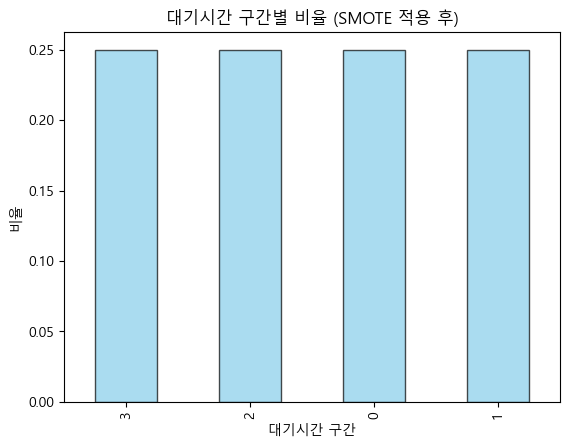

In [87]:
# 각 구간의 비율 시각화 (증강 후)
resampled_data = pd.DataFrame(Y_resampled, columns=['대기시간_구간'])
구간_비율_resampled = resampled_data['대기시간_구간'].value_counts(normalize=True)
구간_비율_resampled.plot(kind='bar', color='skyblue', edgecolor='k', alpha=0.7)
plt.xlabel('대기시간 구간')
plt.ylabel('비율')
plt.title('대기시간 구간별 비율 (SMOTE 적용 후)')
plt.show()

In [95]:
len(data_encoded_resampled) == len(Y_resampled)

True

- 모델 학습

In [103]:
# 학습 및 테스트 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(data_encoded_resampled, Y_resampled, test_size=0.2, random_state=42, stratify=Y)

In [104]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# StandardScaler 적용
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 리스트
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "XGBoost Classifier": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 결과를 저장할 데이터프레임
results = pd.DataFrame(columns=["Model", "Train Accuracy", "Test Accuracy", "Train Precision", "Test Precision", "Train Recall", "Test Recall", "Train F1 Score", "Test F1 Score"])

# 모델 학습 및 평가
for model_name, model in models.items():
    # 교차 검증을 사용한 평가 (학습 데이터)
    train_accuracy = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy').mean()
    train_precision = cross_val_score(model, X_train, Y_train, cv=5, scoring='precision_weighted').mean()
    train_recall = cross_val_score(model, X_train, Y_train, cv=5, scoring='recall_weighted').mean()
    train_f1 = cross_val_score(model, X_train, Y_train, cv=5, scoring='f1_weighted').mean()
    
    # 모델 학습
    model.fit(X_train, Y_train)
    
    # 테스트 데이터에 대한 평가
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    test_precision = precision_score(Y_test, Y_test_pred, average='weighted')
    test_recall = recall_score(Y_test, Y_test_pred, average='weighted')
    test_f1 = f1_score(Y_test, Y_test_pred, average='weighted')
    
    # 결과 저장
    result_row = pd.DataFrame([[model_name, train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_f1, test_f1]], 
                              columns=["Model", "Train Accuracy", "Test Accuracy", "Train Precision", "Test Precision", "Train Recall", "Test Recall", "Train F1 Score", "Test F1 Score"])
    results = pd.concat([results, result_row], ignore_index=True)

results

C:\Users\user\AppData\Local\Temp\ipykernel_22268\3532013825.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score
0,Logistic Regression,0.349077,0.348227,0.348654,0.347415,0.349077,0.348227,0.325313,0.324760
1,Decision Tree Classifier,0.467673,0.482262,0.467539,0.481793,0.467673,0.482262,0.467592,0.482020
2,Random Forest Classifier,0.567480,0.582968,0.561843,0.576841,0.567480,0.582968,0.563977,0.579158
3,Gradient Boosting Classifier,0.425737,0.425477,0.417577,0.417939,0.425737,0.425477,0.416886,0.417316
4,k-Nearest Neighbors,0.462714,0.474446,0.457037,0.468613,0.462714,0.474446,0.454928,0.466764
5,XGBoost Classifier,0.493938,0.494735,0.484684,0.485302,0.493938,0.494735,0.486265,0.486842


In [105]:
# Optuna 목적 함수 정의
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 1.0)
    }
    
    xgb_clf = xgb.XGBClassifier(**param, use_label_encoder=False, eval_metric='mlogloss')
    scores = cross_val_score(xgb_clf, X_train, Y_train, cv=5, scoring='f1_weighted')
    return np.mean(scores)

# Optuna 스터디 초기화 및 최적화 수행
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# 최적 하이퍼파라미터 출력
print("Best parameters found: ", study.best_params)

# 최적 모델 학습
best_params = study.best_params
xgb_clf = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, Y_train)

# 테스트 데이터에 대한 평가
Y_test_pred = xgb_clf.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
test_precision = precision_score(Y_test, Y_test_pred, average='weighted')
test_recall = recall_score(Y_test, Y_test_pred, average='weighted')
test_f1 = f1_score(Y_test, Y_test_pred, average='weighted')

# 결과 저장 및 출력
results = pd.DataFrame(columns=["Model", "Test Accuracy", "Test Precision", "Test Recall", "Test F1 Score"])
result_row = pd.DataFrame([["Optuna Optimized XGBoost with SMOTE", test_accuracy, test_precision, test_recall, test_f1]], 
                          columns=["Model", "Test Accuracy", "Test Precision", "Test Recall", "Test F1 Score"])
results = pd.concat([results, result_row], ignore_index=True)

results

NameError: name 'optuna' is not defined

- 딥러닝

In [ ]:
X_train_deep = X_train.values
X_test_deep = X_test.values
Y_train_deep = Y_train.values
Y_test_deep = Y_test.values

In [108]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 딥러닝 모델 구축 함수
def create_model():
    model = Sequential()
    model.add(Dense(128, input_dim=X_train_deep.shape[1], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # 이진 분류를 가정
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# 교차 검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 결과를 저장할 리스트
train_accuracies = []
train_precisions = []
train_recalls = []
train_f1s = []

# 교차 검증을 통한 학습 및 평가
for train_index, val_index in kf.split(X_train_deep):
    X_train_fold, X_val_fold = X_train_deep[train_index], X_train_deep[val_index]
    Y_train_fold, Y_val_fold = Y_train_deep[train_index], Y_train_deep[val_index]

    model = create_model()
    model.fit(X_train_fold, Y_train_fold, epochs=50, batch_size=32, verbose=0)

    Y_val_pred = (model.predict(X_val_fold) > 0.5).astype("int32")
    train_accuracies.append(accuracy_score(Y_val_fold, Y_val_pred))
    train_precisions.append(precision_score(Y_val_fold, Y_val_pred, average='weighted'))
    train_recalls.append(recall_score(Y_val_fold, Y_val_pred, average='weighted'))
    train_f1s.append(f1_score(Y_val_fold, Y_val_pred, average='weighted'))

# 학습 데이터에 대한 평균 점수 계산
train_accuracy = np.mean(train_accuracies)
train_precision = np.mean(train_precisions)
train_recall = np.mean(train_recalls)
train_f1 = np.mean(train_f1s)

# 전체 학습 데이터로 모델 학습
final_model = create_model()
final_model.fit(X_train_deep, Y_train_deep, epochs=50, batch_size=32, verbose=0)

# 테스트 데이터에 대한 평가
Y_test_pred = (final_model.predict(X_test_deep) > 0.5).astype("int32")
test_accuracy = accuracy_score(Y_test_deep, Y_test_pred)
test_precision = precision_score(Y_test_deep, Y_test_pred, average='weighted')
test_recall = recall_score(Y_test_deep, Y_test_pred, average='weighted')
test_f1 = f1_score(Y_test_deep, Y_test_pred, average='weighted')

# 결과 저장 및 출력
results = pd.DataFrame(columns=["Model", "Train Accuracy", "Test Accuracy", "Train Precision", "Test Precision", "Train Recall", "Test Recall", "Train F1 Score", "Test F1 Score"])
result_row = pd.DataFrame([["Deep Learning Model", train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_f1, test_f1]], 
                          columns=["Model", "Train Accuracy", "Test Accuracy", "Train Precision", "Test Precision", "Train Recall", "Test Recall", "Train F1 Score", "Test F1 Score"])
results = pd.concat([results, result_row], ignore_index=True)

results

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1761/1761 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1761/1761 ━━━━━━━━━━━━━━━━━━━━ 1s 526us/step


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1761/1761 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1761/1761 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1761/1761 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2201/2201 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Temp\ipykernel_19368\4191387273.py:65: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score
0,Deep Learning Model,0.250037,0.249858,0.06252,0.062429,0.250037,0.249858,0.100028,0.099898


### 회귀

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 모델 리스트
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42),
    "Random Forest Regression": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regression": GradientBoostingRegressor(random_state=42)
}

# 결과를 저장할 데이터프레임
results = pd.DataFrame(columns=["Model", "Train Score", "Test Score"])

# 모델 학습 및 평가
for model_name, model in models.items():
    model.fit(X_selected_train, Y_train)
    train_score = model.score(X_selected_train, Y_train)
    test_score = model.score(X_selected_test, Y_test)
    
    # 결과 저장
    result_row = pd.DataFrame([[model_name, train_score, test_score]], columns=["Model", "Train Score", "Test Score"])
    results = pd.concat([results, result_row], ignore_index=True)

results

C:\Users\user\AppData\Local\Temp\ipykernel_12912\2883513281.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


,Model,Train Score,Test Score
0,Linear Regression,0.058141,0.056003
1,Ridge Regression,0.058141,0.056003
2,Lasso Regression,0.025105,0.024330
3,ElasticNet Regression,0.026666,0.025933
4,Decision Tree Regression,0.863460,-0.222287
5,Random Forest Regression,0.793208,0.223985
6,Gradient Boosting Regression,0.233822,0.233902


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 결과를 저장할 데이터프레임
results = pd.DataFrame(columns=["Model", "Train R2", "Test R2", "Train MSE", "Test MSE", "Train MAE", "Test MAE"])

# 모델 학습 및 평가
for model_name, model in models.items():
    model.fit(X_selected_train, Y_train)
    
    # 예측
    y_train_pred = model.predict(X_selected_train)
    y_test_pred = model.predict(X_selected_test)
    
    # R2 계산
    train_r2 = r2_score(Y_train, y_train_pred)
    test_r2 = r2_score(Y_test, y_test_pred)
    
    # MSE 계산
    train_mse = mean_squared_error(Y_train, y_train_pred)
    test_mse = mean_squared_error(Y_test, y_test_pred)
    
    # MAE 계산
    train_mae = mean_absolute_error(Y_train, y_train_pred)
    test_mae = mean_absolute_error(Y_test, y_test_pred)
    
    # 결과 저장
    result_row = pd.DataFrame([[model_name, train_r2, test_r2, train_mse, test_mse, train_mae, test_mae]], 
                              columns=["Model", "Train R2", "Test R2", "Train MSE", "Test MSE", "Train MAE", "Test MAE"])
    results = pd.concat([results, result_row], ignore_index=True)

print(results)

C:\Users\user\AppData\Local\Temp\ipykernel_12912\805031591.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


                          Model  Train R2   Test R2   Train MSE    Test MSE  \
0             Linear Regression  0.058141  0.056003  420.240753  423.737044   
1              Ridge Regression  0.058141  0.056003  420.240753  423.737042   
2              Lasso Regression  0.025105  0.024330  434.980875  437.954352   
3         ElasticNet Regression  0.026666  0.025933  434.284108  437.234848   
4      Decision Tree Regression  0.863460 -0.222287   60.921804  548.654835   
5      Random Forest Regression  0.793208  0.223985   92.266909  348.334067   
6  Gradient Boosting Regression  0.233822  0.233902  341.854912  343.882861   

   Train MAE   Test MAE  
0  15.879993  15.930169  
1  15.879995  15.930171  
2  16.359431  16.405368  
3  16.348701  16.394815  
4   3.489879  16.819524  
5   6.708826  13.730098  
6  14.053951  14.083984  


In [ ]:
results

,Model,Train R2,Test R2,Train MSE,Test MSE,Train MAE,Test MAE
0,Linear Regression,0.058141,0.056003,420.240753,423.737044,15.879993,15.930169
1,Ridge Regression,0.058141,0.056003,420.240753,423.737042,15.879995,15.930171
2,Lasso Regression,0.025105,0.024330,434.980875,437.954352,16.359431,16.405368
3,ElasticNet Regression,0.026666,0.025933,434.284108,437.234848,16.348701,16.394815
4,Decision Tree Regression,0.863460,-0.222287,60.921804,548.654835,3.489879,16.819524
5,Random Forest Regression,0.793208,0.223985,92.266909,348.334067,6.708826,13.730098
6,Gradient Boosting Regression,0.233822,0.233902,341.854912,343.882861,14.053951,14.083984


- 과적합 방지 : 교차검증

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

# 모델 리스트
models = {
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Decision Tree Regression": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "Gradient Boosting Regression": GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "XGBoost Regression": xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
}

# 결과를 저장할 데이터프레임
results = pd.DataFrame(columns=["Model", "Train Score", "Test Score", "Cross-Validation Score"])

# 모델 학습 및 평가
for model_name, model in models.items():
    model.fit(X_selected_train, Y_train)
    train_score = model.score(X_selected_train, Y_train)
    test_score = model.score(X_selected_test, Y_test)
    cv_scores = cross_val_score(model, X_selected_train, Y_train, cv=5, scoring='r2')
    cv_mean_score = np.mean(cv_scores)
    
    # 결과 저장
    result_row = pd.DataFrame([[model_name, train_score, test_score, cv_mean_score]], columns=["Model", "Train Score", "Test Score", "Cross-Validation Score"])
    results = pd.concat([results, result_row], ignore_index=True)

print(results)

C:\Users\user\AppData\Local\Temp\ipykernel_12912\3013380384.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


                          Model  Train Score  Test Score  \
0              Ridge Regression     0.058141    0.056003   
1              Lasso Regression     0.057604    0.055504   
2         ElasticNet Regression     0.055027    0.053082   
3      Decision Tree Regression     0.150244    0.149772   
4      Random Forest Regression     0.153937    0.153242   
5  Gradient Boosting Regression     0.273108    0.268118   
6            XGBoost Regression     0.271217    0.268198   

   Cross-Validation Score  
0                0.058105  
1                0.057573  
2                0.054997  
3                0.149674  
4                0.153375  
5                0.266472  
6                0.266384  


In [ ]:
results

,Model,Train Score,Test Score,Cross-Validation Score
0,Ridge Regression,0.058141,0.056003,0.058105
1,Lasso Regression,0.057604,0.055504,0.057573
2,ElasticNet Regression,0.055027,0.053082,0.054997
3,Decision Tree Regression,0.150244,0.149772,0.149674
4,Random Forest Regression,0.153937,0.153242,0.153375
5,Gradient Boosting Regression,0.273108,0.268118,0.266472
6,XGBoost Regression,0.271217,0.268198,0.266384


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

# 모델 리스트
models = {
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Decision Tree Regression": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "Gradient Boosting Regression": GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "XGBoost Regression": xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
}

# 결과를 저장할 데이터프레임
results = pd.DataFrame(columns=["Model", "Train Score", "Test Score", "Cross-Validation Score"])

# 모델 학습 및 평가
for model_name, model in models.items():
    model.fit(X_selected_train, Y_train)
    train_score = model.score(X_selected_train, Y_train)
    test_score = model.score(X_selected_test, Y_test)
    cv_scores = cross_val_score(model, X_selected_train, Y_train, cv=5, scoring='r2')
    cv_mean_score = np.mean(cv_scores)
    
    # 결과 저장
    result_row = pd.DataFrame([[model_name, train_score, test_score, cv_mean_score]], columns=["Model", "Train Score", "Test Score", "Cross-Validation Score"])
    results = pd.concat([results, result_row], ignore_index=True)
    
results

C:\Users\user\AppData\Local\Temp\ipykernel_22112\271543622.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


,Model,Train Score,Test Score,Cross-Validation Score
0,Ridge Regression,0.051847,0.050350,0.051800
1,Lasso Regression,0.000000,-0.000005,-0.000010
2,ElasticNet Regression,0.017545,0.017095,0.017515
3,Decision Tree Regression,0.082204,0.080728,0.080901
4,Random Forest Regression,0.085665,0.084108,0.085326
5,Gradient Boosting Regression,0.155702,0.150622,0.150585
6,XGBoost Regression,0.154925,0.150377,0.150663


- 7가지 모델 + 신경망 추가

In [ ]:
from sklearn.neural_network import MLPRegressor

# 모델 리스트
models = {
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Decision Tree Regression": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "Gradient Boosting Regression": GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "XGBoost Regression": xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "Neural Network Regression": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

# 결과를 저장할 데이터프레임
results = pd.DataFrame(columns=["Model", "Train R2", "Test R2", "Train MSE", "Test MSE", "Train MAE", "Test MAE", "Cross-Validation Score"])

# 모델 학습 및 평가
for model_name, model in models.items():
    model.fit(X_selected_train, Y_train)
    
    # 예측
    y_train_pred = model.predict(X_selected_train)
    y_test_pred = model.predict(X_selected_test)
    
    # R2 계산
    train_r2 = r2_score(Y_train, y_train_pred)
    test_r2 = r2_score(Y_test, y_test_pred)
    
    # MSE 계산
    train_mse = mean_squared_error(Y_train, y_train_pred)
    test_mse = mean_squared_error(Y_test, y_test_pred)
    
    # MAE 계산
    train_mae = mean_absolute_error(Y_train, y_train_pred)
    test_mae = mean_absolute_error(Y_test, y_test_pred)
    
    # 교차 검증 점수 계산
    cv_scores = cross_val_score(model, X_selected_train, Y_train, cv=5, scoring='r2')
    cv_mean_score = np.mean(cv_scores)
    
    # 결과 저장
    result_row = pd.DataFrame([[model_name, train_r2, test_r2, train_mse, test_mse, train_mae, test_mae, cv_mean_score]], 
                              columns=["Model", "Train R2", "Test R2", "Train MSE", "Test MSE", "Train MAE", "Test MAE", "Cross-Validation Score"])
    results = pd.concat([results, result_row], ignore_index=True)

results

C:\Users\user\AppData\Local\Temp\ipykernel_12912\223659159.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python39\lib

,Model,Train R2,Test R2,Train MSE,Test MSE,Train MAE,Test MAE,Cross-Validation Score
0,Ridge Regression,0.058141,0.056003,420.240753,423.737042,15.879995,15.930171,0.058105
1,Lasso Regression,0.057604,0.055504,420.480309,423.961111,15.905850,15.955347,0.057573
2,ElasticNet Regression,0.055027,0.053082,421.630175,425.048110,15.958512,16.007739,0.054997
3,Decision Tree Regression,0.150244,0.149772,379.146077,381.646478,14.860274,14.900229,0.149674
4,Random Forest Regression,0.153937,0.153242,377.498373,380.089049,14.839138,14.880456,0.153375
5,Gradient Boosting Regression,0.273108,0.268118,324.325981,328.523824,13.583238,13.636036,0.266472
6,XGBoost Regression,0.271217,0.268198,325.169863,328.488194,13.596920,13.643660,0.266384
7,Neural Network Regression,0.291020,0.280039,316.334394,323.172941,13.411169,13.526215,0.265040


In [ ]:
from sklearn.neural_network import MLPRegressor

# 모델 리스트
models = {
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Decision Tree Regression": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "Gradient Boosting Regression": GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "XGBoost Regression": xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "Neural Network Regression": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

# 결과를 저장할 데이터프레임
results = pd.DataFrame(columns=["Model", "Train R2", "Test R2", "Train MSE", "Test MSE", "Train MAE", "Test MAE", "Cross-Validation Score"])

# 모델 학습 및 평가
for model_name, model in models.items():
    model.fit(X_selected_train, Y_train)
    
    # 예측
    y_train_pred = model.predict(X_selected_train)
    y_test_pred = model.predict(X_selected_test)
    
    # R2 계산
    train_r2 = r2_score(Y_train, y_train_pred)
    test_r2 = r2_score(Y_test, y_test_pred)
    
    # MSE 계산
    train_mse = mean_squared_error(Y_train, y_train_pred)
    test_mse = mean_squared_error(Y_test, y_test_pred)
    
    # MAE 계산
    train_mae = mean_absolute_error(Y_train, y_train_pred)
    test_mae = mean_absolute_error(Y_test, y_test_pred)
    
    # 교차 검증 점수 계산
    cv_scores = cross_val_score(model, X_selected_train, Y_train, cv=5, scoring='r2')
    cv_mean_score = np.mean(cv_scores)
    
    # 결과 저장
    result_row = pd.DataFrame([[model_name, train_r2, test_r2, train_mse, test_mse, train_mae, test_mae, cv_mean_score]], 
                              columns=["Model", "Train R2", "Test R2", "Train MSE", "Test MSE", "Train MAE", "Test MAE", "Cross-Validation Score"])
    results = pd.concat([results, result_row], ignore_index=True)

results

NameError: name 'mean_absolute_error' is not defined

- standard scaler 사용해보기

In [ ]:
top_features

array(['접수시간', '주말', '월', '호출지위도', '호출지경도', '요일', '목적지위도', '목적지경도'],
      dtype=object)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.756470,0.599642,-0.131569,0.042423,-0.788826,1.229813,-0.640378,1.435211,-0.413294,-0.159632,0.868373,0.836009
1,-0.204418,-0.306930,1.066441,-0.344574,0.170146,-1.721638,0.019846,-0.512392,-0.413294,-0.159632,0.309887,-0.837052
2,-1.341237,-1.213503,-1.329579,-0.602572,0.810578,0.911233,1.683318,1.253285,-0.413294,-0.159632,-0.527842,0.278322
3,-0.218179,-0.306930,1.066441,0.816418,-0.249636,-1.369300,0.219596,-1.426780,-0.413294,-0.159632,-0.527842,-0.837052
4,0.171331,-0.004739,0.267768,0.171422,-1.197143,-1.233608,-1.039045,-0.444842,-0.413294,-0.159632,-1.365572,-0.279365
...,...,...,...,...,...,...,...,...,...,...,...,...
521059,0.419387,0.297452,0.068100,0.171422,-0.845267,-0.254598,-1.148833,-0.038771,-0.413294,-0.159632,-0.248599,0.836009
521060,-1.285436,-1.213503,-1.129910,-0.602572,1.882962,1.308311,1.675155,2.145412,-0.413294,-0.159632,0.589130,-0.837052
521061,0.315911,0.297452,0.068100,0.171422,-0.845267,-0.254598,-1.148833,-0.038771,-0.413294,-0.159632,-0.248599,-1.394739
521062,0.443851,0.297452,-0.930242,-0.473573,0.870547,-0.826534,0.934631,-0.879775,-0.413294,-0.159632,0.868373,0.836009


In [ ]:
data_encoded.columns.to_list()

['접수일시',
 '월',
 '출발지역',
 '목적지역',
 '호출지경도',
 '호출지위도',
 '목적지경도',
 '목적지위도',
 '주말',
 '공휴일',
 '접수시간',
 '요일']

In [ ]:
X_train_scaled.columns = data_encoded.columns.to_list()
X_train_scaled

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,주말,공휴일,접수시간,요일
0,0.756470,0.599642,-0.131569,0.042423,-0.788826,1.229813,-0.640378,1.435211,-0.413294,-0.159632,0.868373,0.836009
1,-0.204418,-0.306930,1.066441,-0.344574,0.170146,-1.721638,0.019846,-0.512392,-0.413294,-0.159632,0.309887,-0.837052
2,-1.341237,-1.213503,-1.329579,-0.602572,0.810578,0.911233,1.683318,1.253285,-0.413294,-0.159632,-0.527842,0.278322
3,-0.218179,-0.306930,1.066441,0.816418,-0.249636,-1.369300,0.219596,-1.426780,-0.413294,-0.159632,-0.527842,-0.837052
4,0.171331,-0.004739,0.267768,0.171422,-1.197143,-1.233608,-1.039045,-0.444842,-0.413294,-0.159632,-1.365572,-0.279365
...,...,...,...,...,...,...,...,...,...,...,...,...
521059,0.419387,0.297452,0.068100,0.171422,-0.845267,-0.254598,-1.148833,-0.038771,-0.413294,-0.159632,-0.248599,0.836009
521060,-1.285436,-1.213503,-1.129910,-0.602572,1.882962,1.308311,1.675155,2.145412,-0.413294,-0.159632,0.589130,-0.837052
521061,0.315911,0.297452,0.068100,0.171422,-0.845267,-0.254598,-1.148833,-0.038771,-0.413294,-0.159632,-0.248599,-1.394739
521062,0.443851,0.297452,-0.930242,-0.473573,0.870547,-0.826534,0.934631,-0.879775,-0.413294,-0.159632,0.868373,0.836009


- 과적합 방지 : StandardScaler + 교차검증 사용

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

# 타겟 변수와 특징 변수 분리
target_variable = '총대기시간(분)'  # 예시로 설정한 타겟 변수
X = data_encoded
Y = Y

# 학습 및 테스트 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# StandardScaler 적용
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = data_encoded.columns.to_list()
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.columns = data_encoded.columns.to_list()

X_train_scaled = X_train_scaled[top_features]
X_test_scaled = X_test_scaled[top_features]

# 모델 리스트
models = {
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Decision Tree Regression": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "Gradient Boosting Regression": GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "XGBoost Regression": xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
}

# 결과를 저장할 데이터프레임
results = pd.DataFrame(columns=["Model", "Train Score", "Test Score", "Cross-Validation Score"])

# 모델 학습 및 평가
for model_name, model in models.items():
    model.fit(X_train_scaled, Y_train)
    train_score = model.score(X_train_scaled, Y_train)
    test_score = model.score(X_test_scaled, Y_test)
    cv_scores = cross_val_score(model, X_train_scaled, Y_train, cv=5, scoring='r2')
    cv_mean_score = np.mean(cv_scores)
    
    # 결과 저장
    result_row = pd.DataFrame([[model_name, train_score, test_score, cv_mean_score]], columns=["Model", "Train Score", "Test Score", "Cross-Validation Score"])
    results = pd.concat([results, result_row], ignore_index=True)

print(results)

C:\Users\user\AppData\Local\Temp\ipykernel_21296\2798714548.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


                          Model  Train Score  Test Score  \
0              Ridge Regression     0.058141    0.056003   
1              Lasso Regression     0.057920    0.055777   
2         ElasticNet Regression     0.057849    0.055727   
3      Decision Tree Regression     0.150244    0.149772   
4      Random Forest Regression     0.153936    0.153242   
5  Gradient Boosting Regression     0.273108    0.268115   
6            XGBoost Regression     0.271217    0.268198   

   Cross-Validation Score  
0                0.058105  
1                0.057885  
2                0.057816  
3                0.149674  
4                0.153375  
5                0.266476  
6                0.266384  


In [ ]:
results

,Model,Train Score,Test Score,Cross-Validation Score
0,Ridge Regression,0.058141,0.056003,0.058105
1,Lasso Regression,0.057920,0.055777,0.057885
2,ElasticNet Regression,0.057849,0.055727,0.057816
3,Decision Tree Regression,0.150244,0.149772,0.149674
4,Random Forest Regression,0.153936,0.153242,0.153375
5,Gradient Boosting Regression,0.273108,0.268115,0.266476
6,XGBoost Regression,0.271217,0.268198,0.266384


### 과적합 줄이기
1. 교차 검증 (Cross-Validation) 사용 *
2. 규제 (Regularization) 사용 *
3. 모델 복잡도 줄이기 
4. 앙상블 기법 사용 
5. 특성 선택 (Feature Selection) *
6. 드롭아웃 사용 (신경망의 경우)

### Gradient Boosting + Genetic 튜닝

In [ ]:
from tpot import TPOTRegressor

# TPOTRegressor 사용하여 하이퍼파라미터 튜닝
tpot = TPOTRegressor(generations=10, population_size=50, verbosity=2, config_dict={
    'sklearn.ensemble.GradientBoostingRegressor': {
        'n_estimators': range(50, 201),  # 50에서 200까지의 값
        'max_depth': range(3, 8),  # 3에서 7까지의 값
        'learning_rate': np.arange(0.01, 0.21, 0.01),  # 0.01에서 0.2까지의 값
        'subsample': np.arange(0.6, 1.1, 0.1),  # 0.6에서 1.0까지의 값
        'min_samples_split': range(2, 11),  # 2에서 10까지의 값
        'min_samples_leaf': range(1, 5),  # 1에서 4까지의 값
        'max_features': ['sqrt', 'log2', None]  # 선택 가능한 특성
    }
})

tpot.fit(X_selected_train, Y_train)

# 최적 모델로 테스트 성능 평가
y_train_pred = tpot.predict(X_selected_train)
y_test_pred = tpot.predict(X_selected_test)

train_r2 = r2_score(Y_train, y_train_pred)
test_r2 = r2_score(Y_test, y_test_pred)
train_mse = mean_squared_error(Y_train, y_train_pred)
test_mse = mean_squared_error(Y_test, y_test_pred)
train_mae = mean_absolute_error(Y_train, y_train_pred)
test_mae = mean_absolute_error(Y_test, y_test_pred)

print(f"Train R2: {train_r2}, Test R2: {test_r2}")
print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")
print(f"Train MAE: {train_mae}, Test MAE: {test_mae}")

# 교차 검증 점수 계산
cv_scores = cross_val_score(tpot.fitted_pipeline_, X_selected_train, Y_train, cv=5, scoring='r2')
cv_mean_score = np.mean(cv_scores)
print(f"Cross-Validation R2: {cv_mean_score}")

# 최적의 파이프라인 출력
print(tpot.fitted_pipeline_)

### XGBoost Regression + Genetic 튜닝

In [ ]:
import xgboost as xgb

# TPOTRegressor 사용하여 하이퍼파라미터 튜닝
tpot = TPOTRegressor(generations=10, population_size=50, verbosity=2, config_dict={
    'xgboost.XGBRegressor': {
        'n_estimators': range(50, 201),  # 50에서 200까지의 값
        'max_depth': range(3, 8),  # 3에서 7까지의 값
        'learning_rate': np.arange(0.01, 0.21, 0.01),  # 0.01에서 0.2까지의 값
        'subsample': np.arange(0.6, 1.1, 0.1),  # 0.6에서 1.0까지의 값
        'min_child_weight': range(1, 11),  # 1에서 10까지의 값
        'gamma': np.arange(0, 0.5, 0.05),  # 0에서 0.5까지의 값
        'colsample_bytree': np.arange(0.6, 1.1, 0.1)  # 0.6에서 1.0까지의 값
    }
})

tpot.fit(X_selected_train, Y_train)

# 최적 모델로 테스트 성능 평가
y_train_pred = tpot.predict(X_selected_train)
y_test_pred = tpot.predict(X_selected_test)

train_r2 = r2_score(Y_train, y_train_pred)
test_r2 = r2_score(Y_test, y_test_pred)
train_mse = mean_squared_error(Y_train, y_train_pred)
test_mse = mean_squared_error(Y_test, y_test_pred)
train_mae = mean_absolute_error(Y_train, y_train_pred)
test_mae = mean_absolute_error(Y_test, y_test_pred)

print(f"Train R2: {train_r2}, Test R2: {test_r2}")
print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")
print(f"Train MAE: {train_mae}, Test MAE: {test_mae}")

# 교차 검증 점수 계산
cv_scores = cross_val_score(tpot.fitted_pipeline_, X_selected_train, Y_train, cv=5, scoring='r2')
cv_mean_score = np.mean(cv_scores)
print(f"Cross-Validation R2: {cv_mean_score}")

# 최적의 파이프라인 출력
print(tpot.fitted_pipeline_)